<a href="https://colab.research.google.com/github/annabohrer/Data-Science/blob/main/Anna_Bohrer_Stats_Lab_8_Linear_Model_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

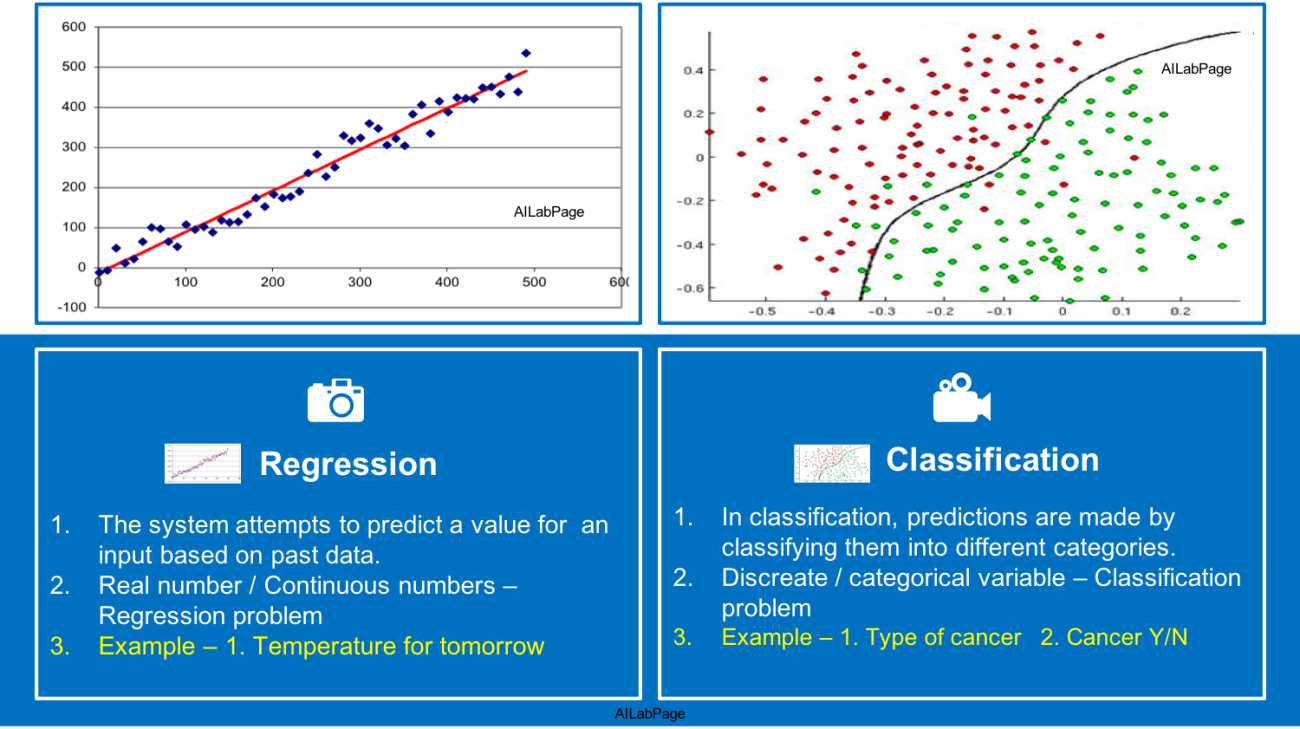

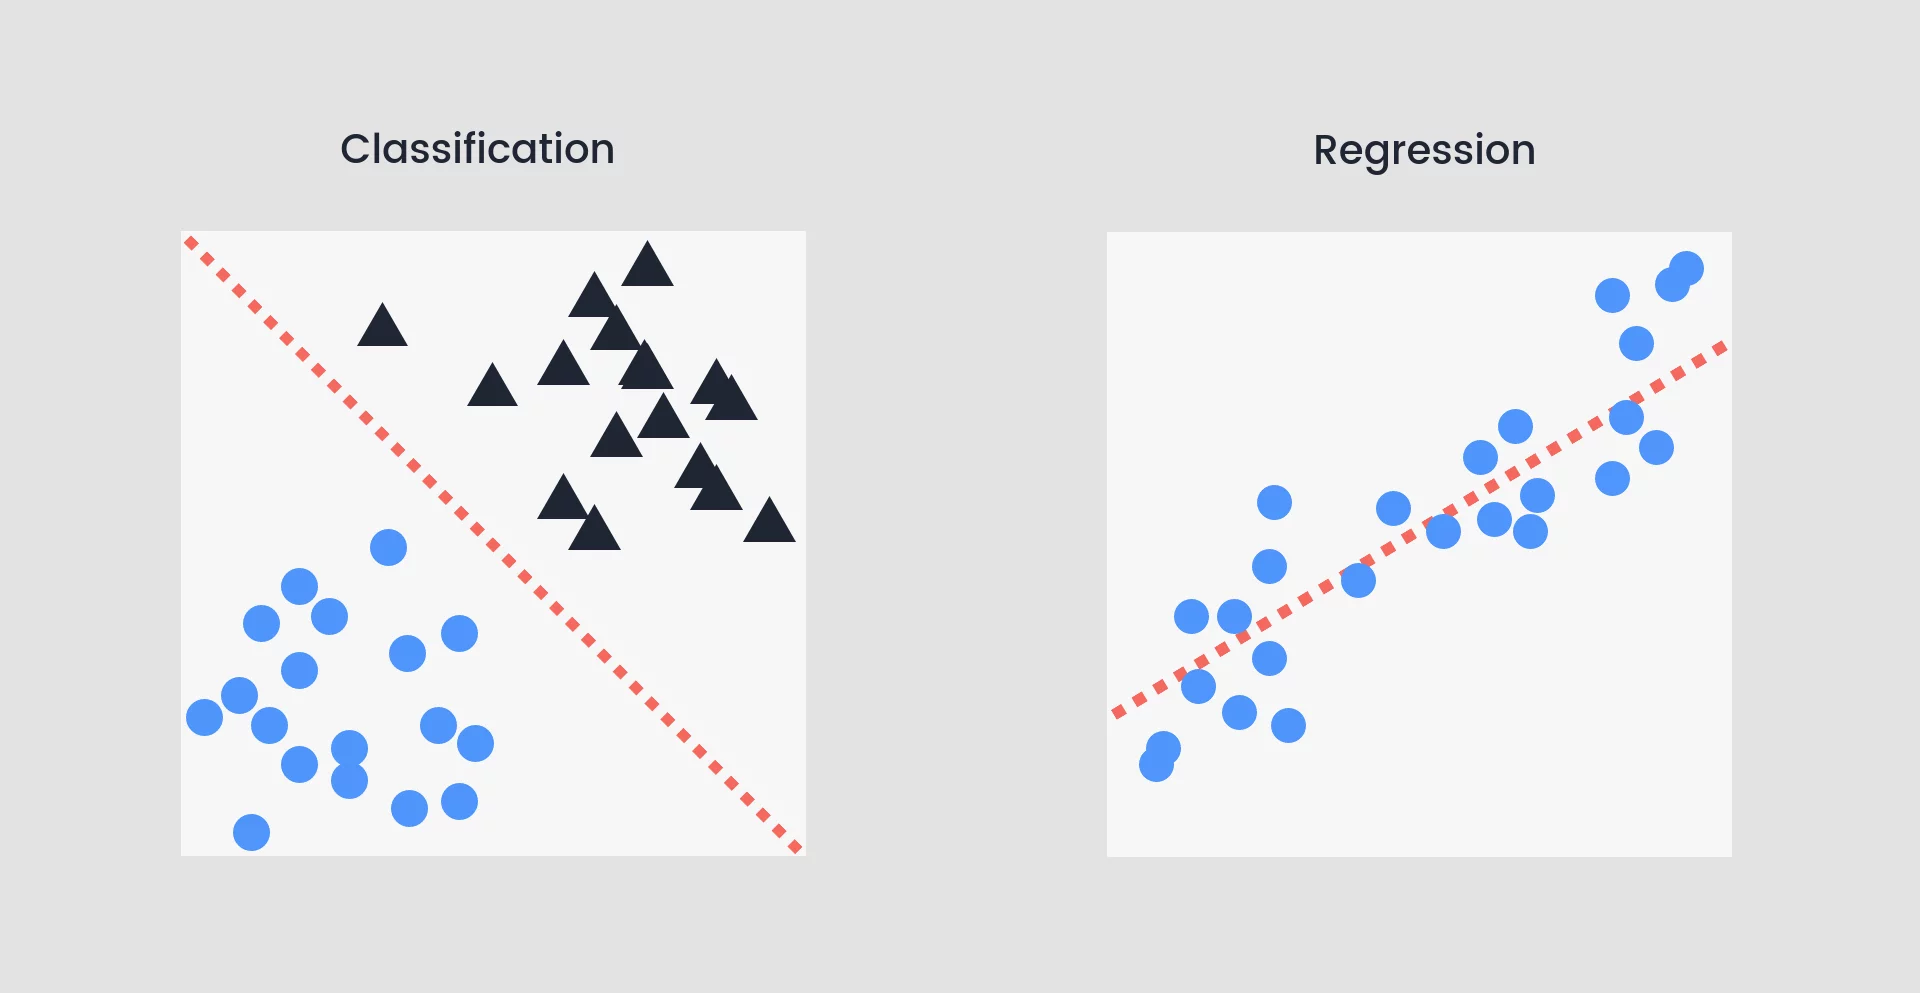

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing

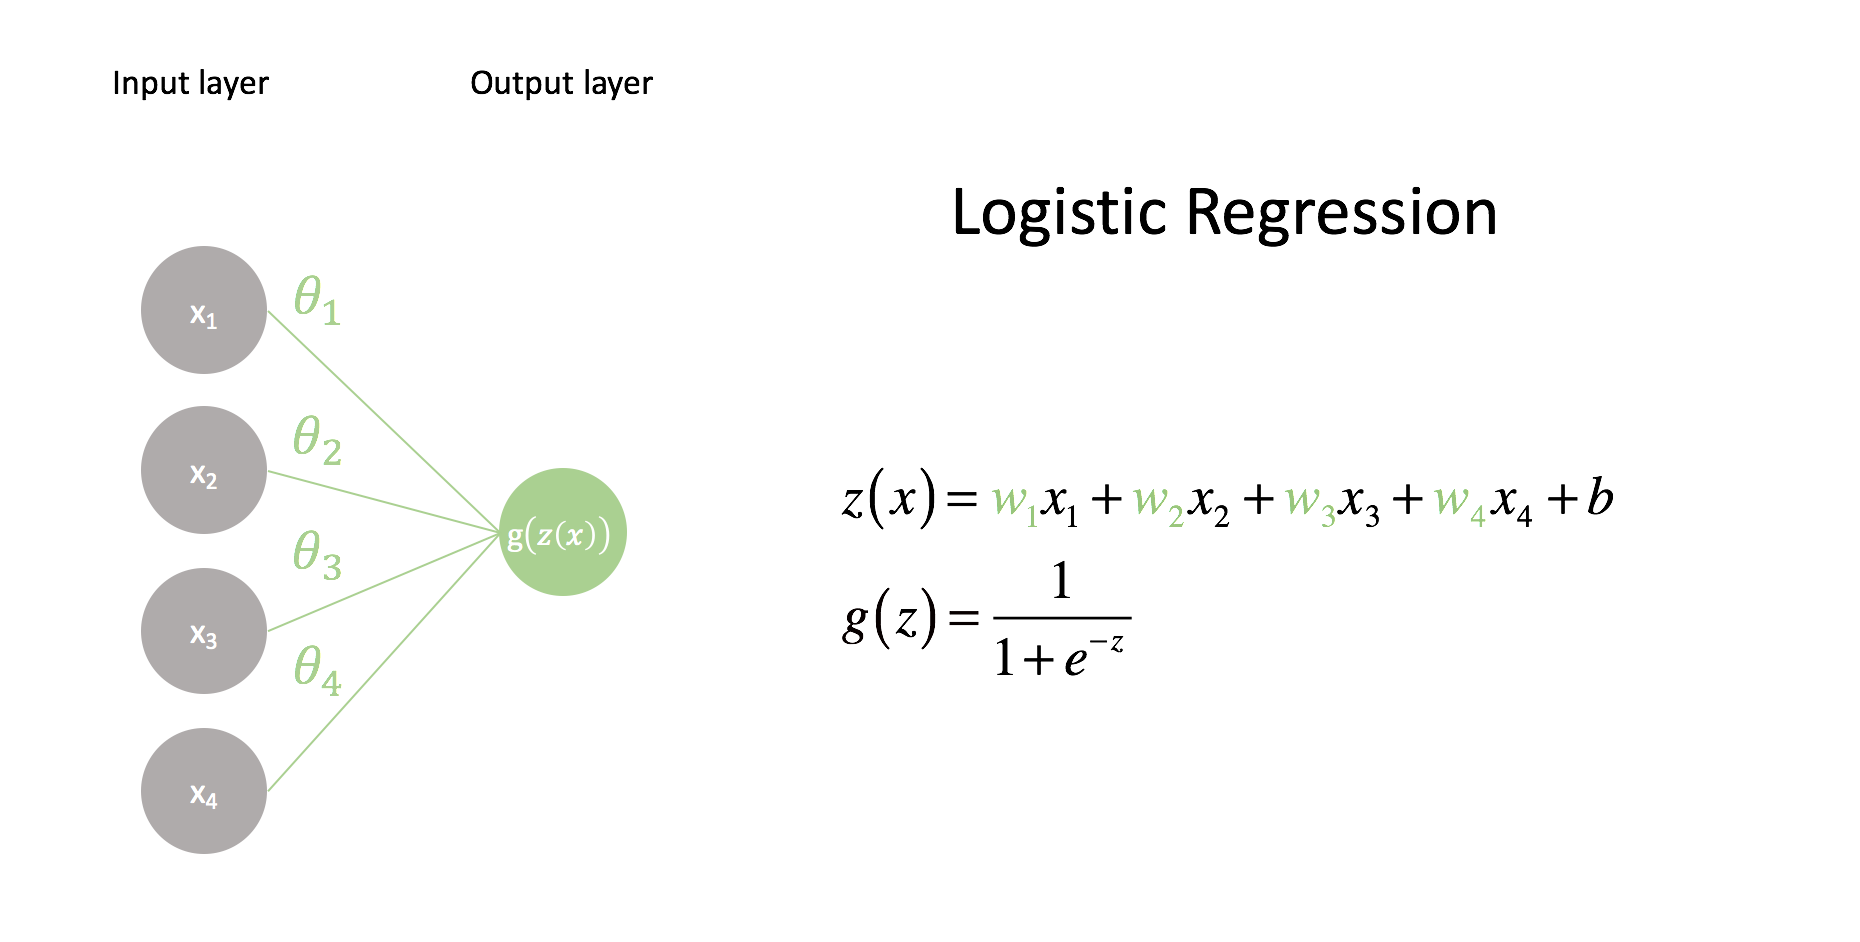

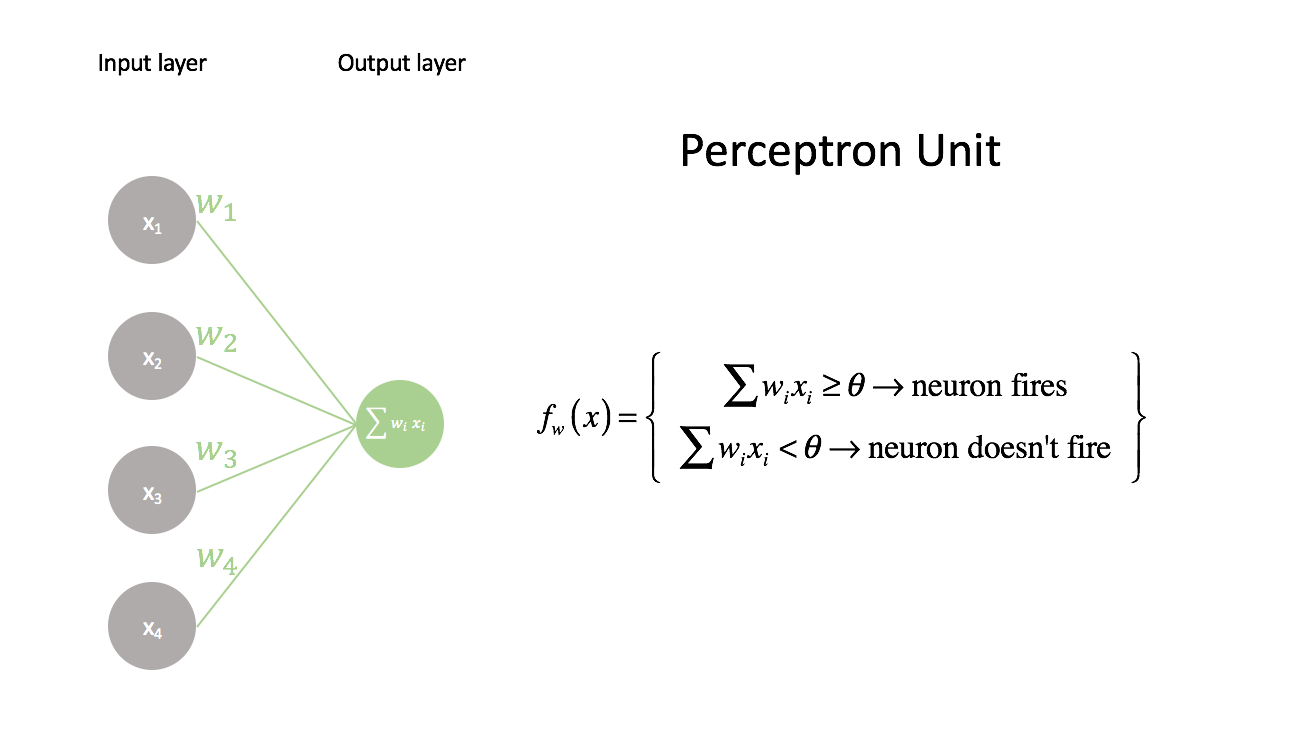

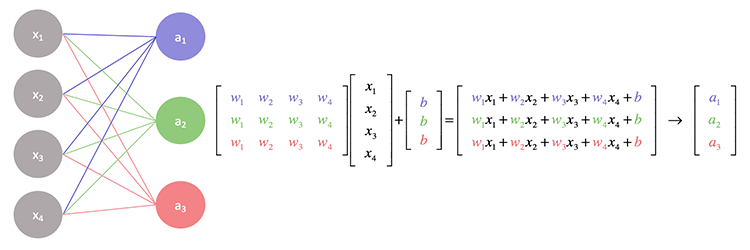

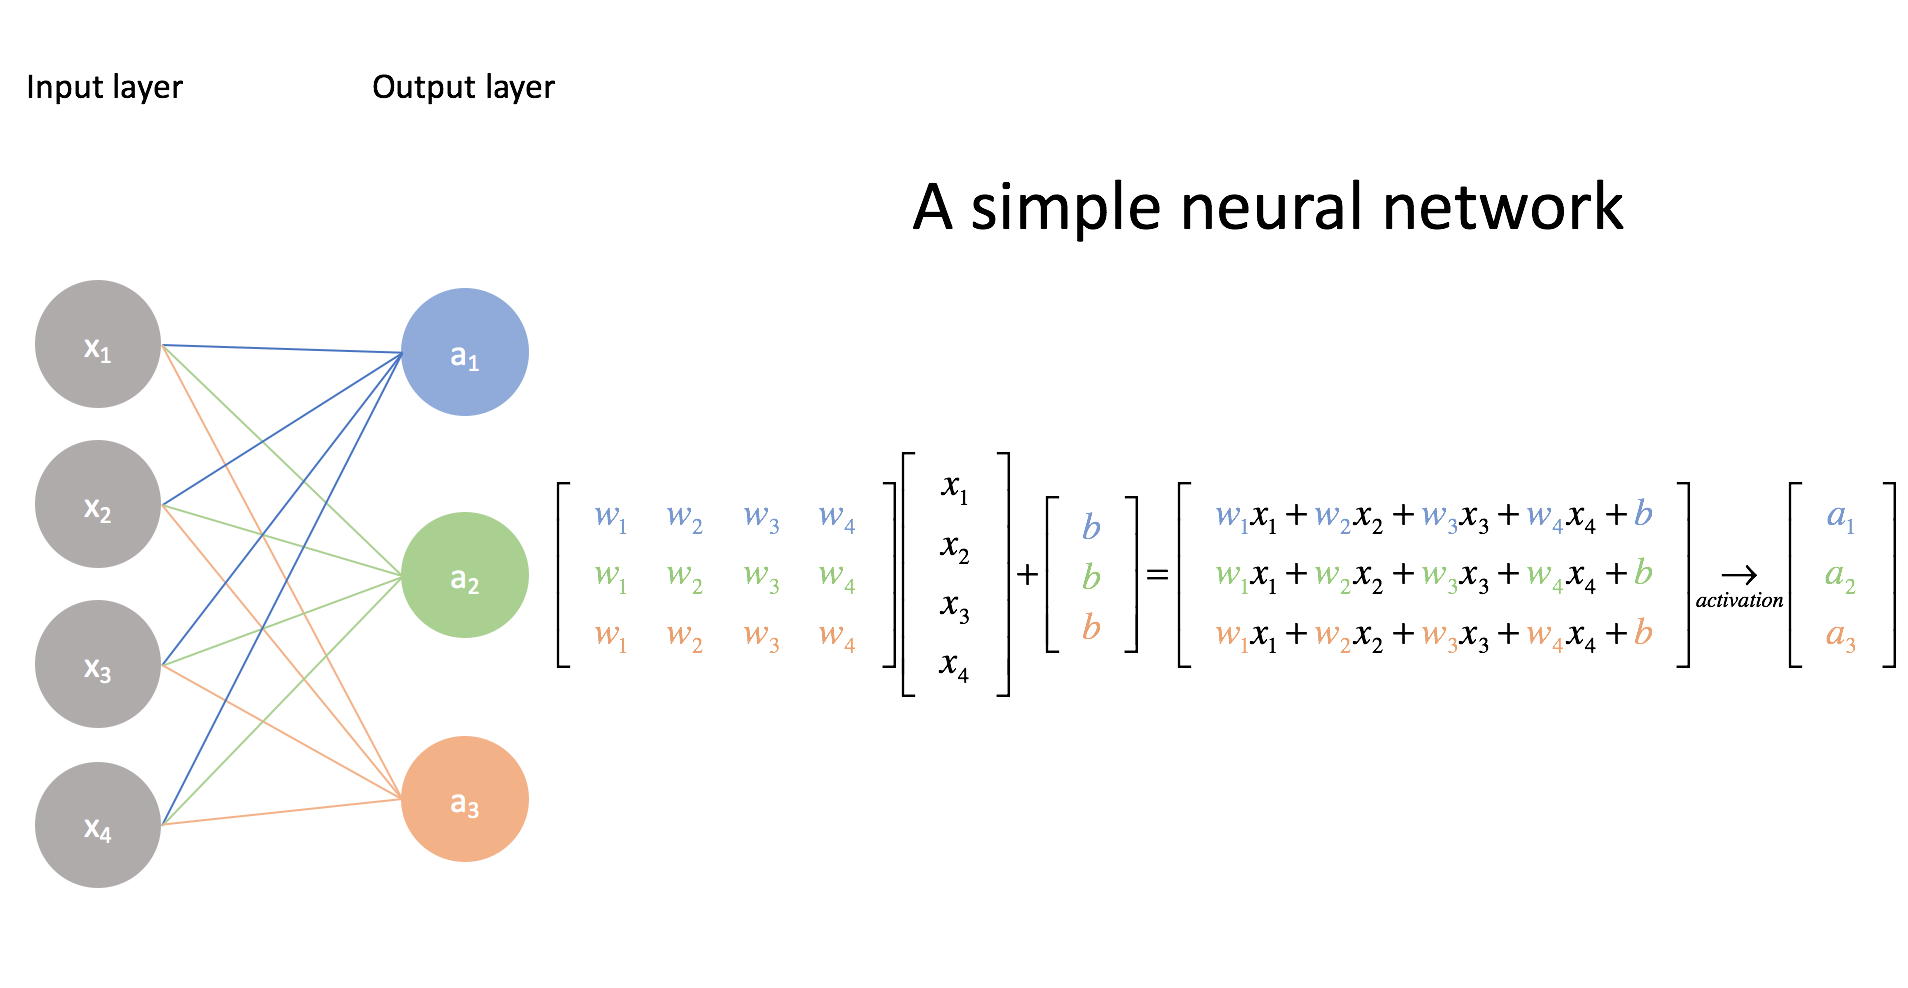

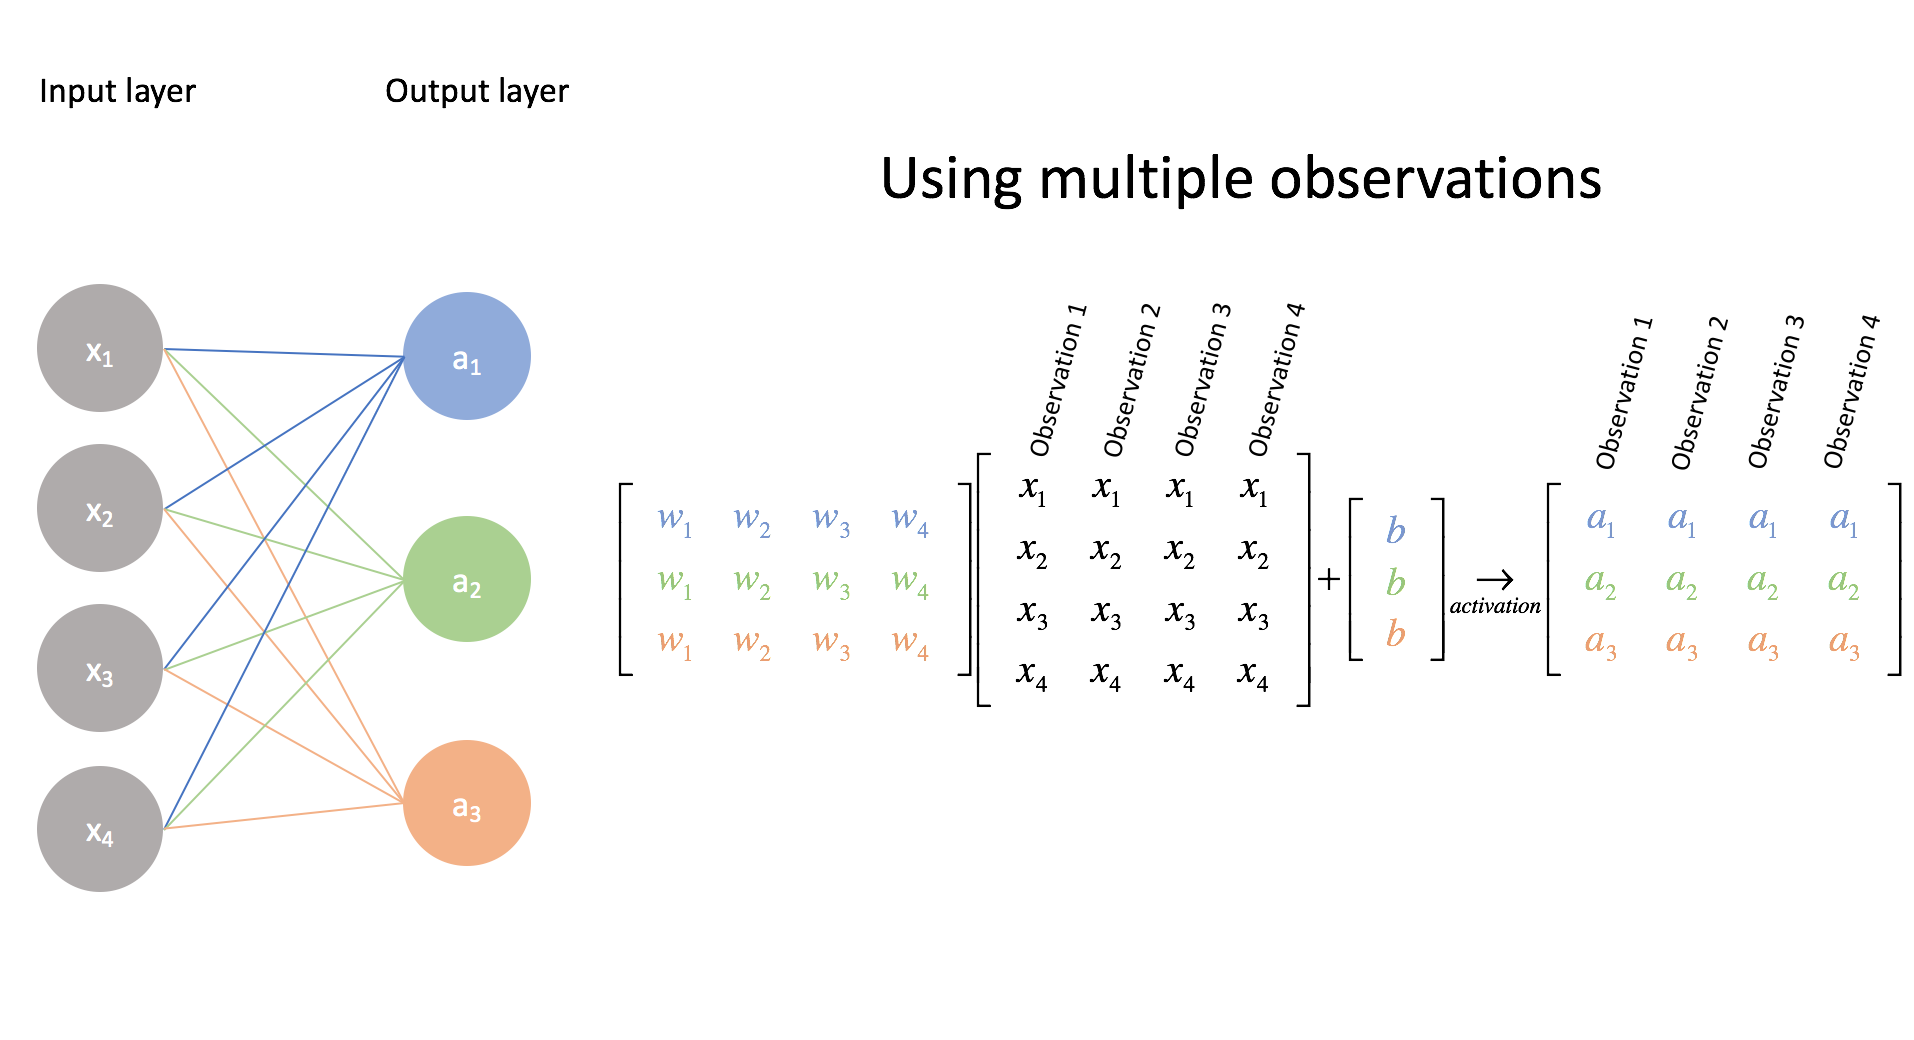

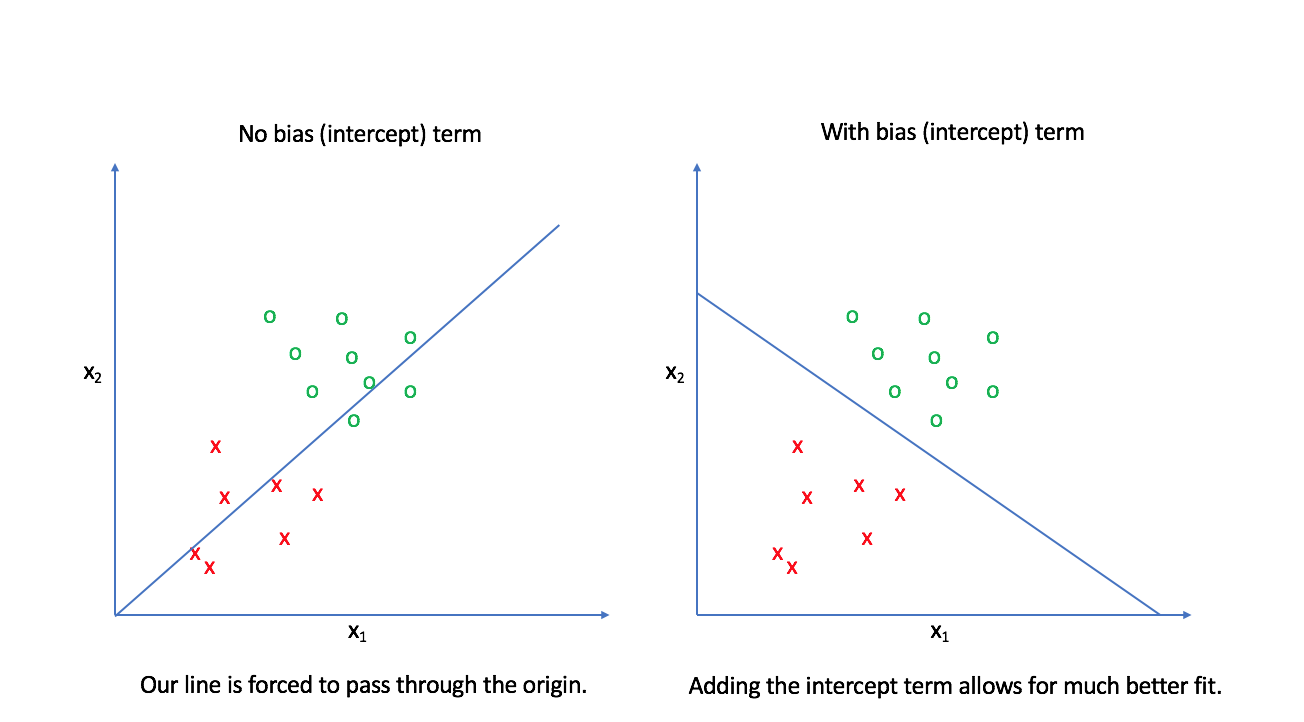

In [ ]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-epsamluc
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-epsamluc
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-py3-none-any.whl size=7683 sha256=42ce98be09811291af1eb542141f98c629f2f1175db9ba582ebacfbdae73c73c
  Stored in directory: /tmp/pip-ephem-wheel-cache-ggorfogr/wheels/81/51/4e/93fa1b6f290ba71f589593454d4d769f9baebd8c4c376822d9
Successfully built ImportMPCR


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=d5a7dc8fa570c145d4a9903f7599f7a8ee40342895cd3e0ffbd591ab91b35db9
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


# $y=mx+b$

In [ ]:
x = np.arange(0,9)                                                              #creating an array

In [ ]:
x.shape                                                                         #the output

(9,)

In [ ]:
x = x[:,None]                                                                   #defining x

In [ ]:
x.shape                                                                         #what this equals using what was stated from above

(9, 1)

In [ ]:
y = 3*x-5                                                                       #defining y

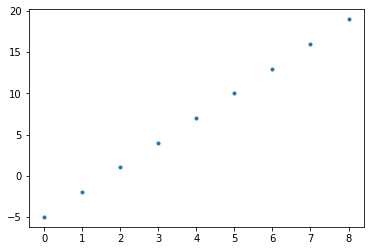

In [ ]:
plt.plot(x,y,'.')                                                               #ploting x and y with dots

##Solve Linear Fit Using Pytorch Gradient Descent

In [ ]:
x = torch.Tensor(x) # Convert the numpy vectors to pytorch tensors 
y = torch.Tensor(y)

In [ ]:
m = Variable(randn(1,1), requires_grad=True) # Initialize pytorch variables, i.e. values you want to optimize. In this case with normally distributed random numbers, one for m the slope and one for b the interscept
b = Variable(randn(1,1), requires_grad=True)

In [ ]:
learning_rate = 0.001 # Descend Gradient Slowly so as to Not Overshoot Minima and Oscillate

In [ ]:
for t in range(1000):

    y_pred = m * x + b  # Define Model 
    
    loss = (y_pred - y).pow(2).sum() # Define Loss Function as Sum of the Squares of the Differences 

    loss.backward() # Calculate Gradient, dLoss/dp for Each Parameter p 
    
    m.data -= learning_rate * m.grad.data # Gradient Descent
    b.data -= learning_rate * b.grad.data

    m.grad.zero_() # Reset Gradient Value
    b.grad.zero_()

    print(t, loss.item(),m.item(),b.item())

In [ ]:
loss.item()                                                                     #showing what the loss item is

0.0038064986001700163

In [ ]:
m.item()                                                                        #showing what the m item is

2.9932589530944824

In [ ]:
b.item()                                                                        #printing the b item

-4.962280750274658

# Pytorch Linear Model

In [ ]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.01

In [ ]:
# Linear regression model
model = nn.Linear(input_size, output_size)

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [ ]:
# Convert numpy arrays to torch tensors
inputs = x
targets = y

In [ ]:
# Train the model
for epoch in range(num_epochs):
    
    
    # Forward pass
    outputs = model(inputs)
    
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    print(epoch+1, num_epochs, loss.item())


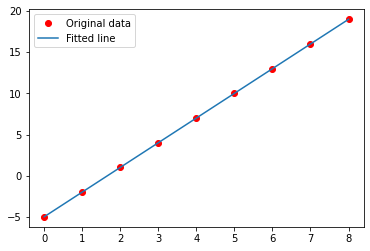

In [ ]:
# Plot the graph
predicted = model(inputs).detach().numpy()


plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
model                                                                           #what the model is

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
model.weight                                                                    #the model is shown with the weight defined

Parameter containing:
tensor([[2.9970]], requires_grad=True)

In [ ]:
model.bias                                                                      #the parameter that is found

Parameter containing:
tensor([-4.9832], requires_grad=True)

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
def plotfc(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'cool')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.colorbar(im)
    plt.show()

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [ ]:
# #MNIST
#train_set = datasets.MNIST('./data', train=True, download=True)
#test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
train_set = datasets.KMNIST('./data', train=True, download=True)
test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
#train_set = datasets.FashionMNIST('./data', train=True, download=True)
#test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/18165135 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/29497 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/3041136 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/5120 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw



In [ ]:
X = train_set.data.numpy()                                                      #defining x
X_test = test_set.data.numpy()                                                  #what x test is equal to
Y = train_set.targets.numpy()                                                   #defining y
Y_test = test_set.targets.numpy()                                               #what y test is equal to

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape                                                                         #the shape of x

(60000, 1, 28, 28)

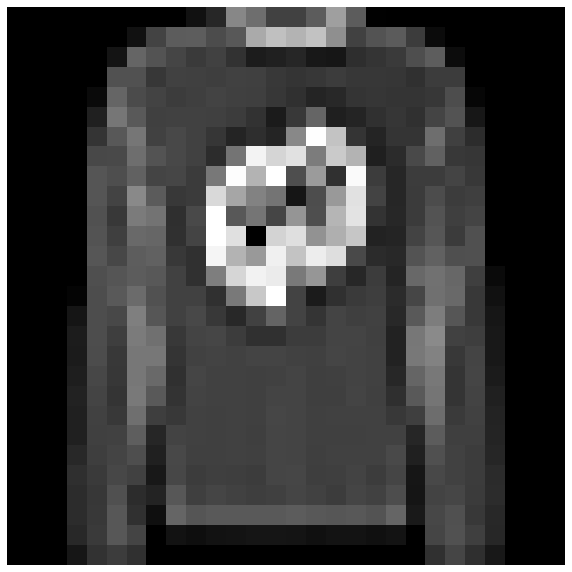

In [ ]:
plot(X[123,0,:,:])                                                              #plotting it to create an image

In [ ]:
Y[123]                                                                          #what the number is in that spot

2

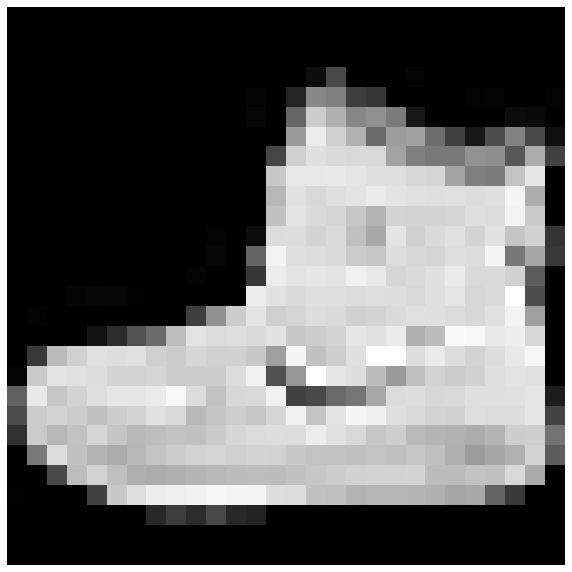

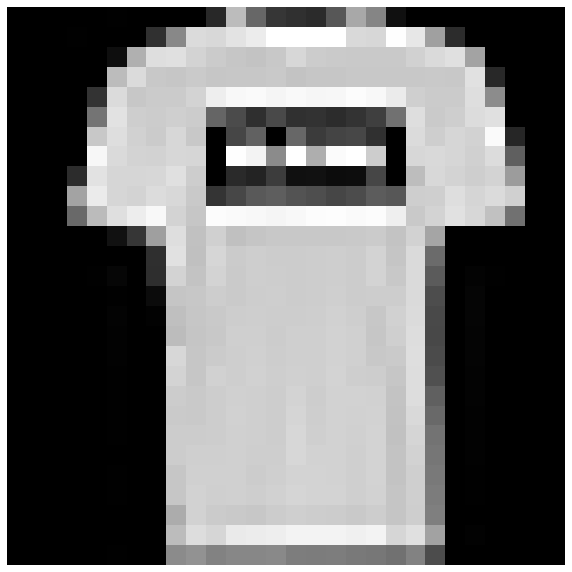

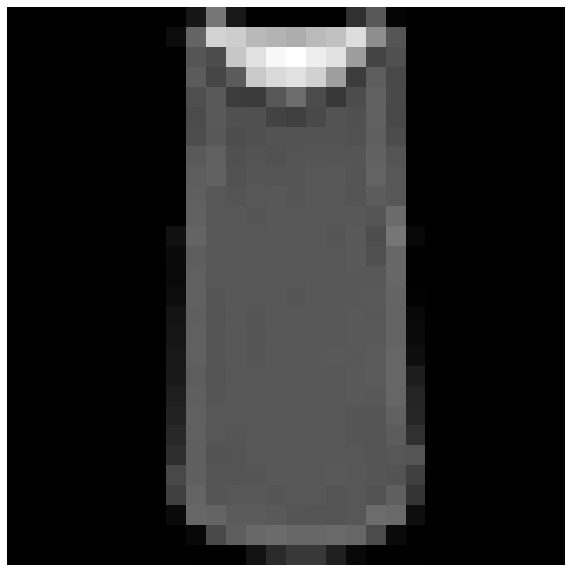

In [ ]:
for i in range(3):                                                              #plotting anew image
    plot(X[i,0,:,:])

In [ ]:
Y                                                                               #the array that y equals to

array([9, 0, 0, ..., 3, 0, 5])

In [ ]:
X[0:25,0,:,:].shape                                                             #the array that is formed

(25, 28, 28)

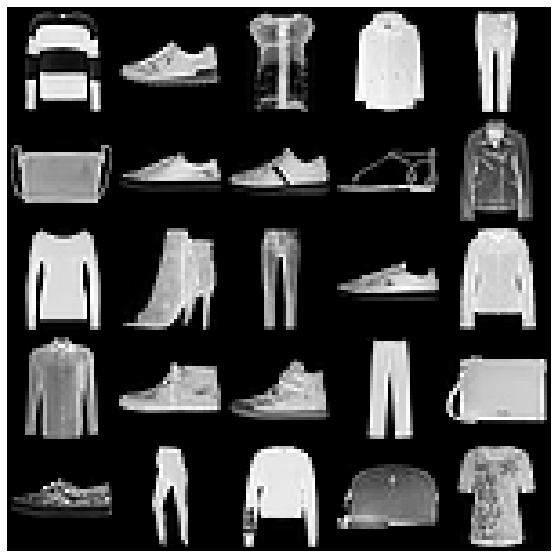

In [ ]:
montage_plot(X[125:150,0,:,:])                                                  #creating different images

In [ ]:
X.shape[0]                                                                      #the array at that area

60000

In [ ]:
X_test.shape                                                                    #the array of the x test

(10000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape[0]                                                                 #the integer

10000

In [ ]:
X = X.reshape(X.shape[0],784)                                                   #a new x
X_test = X_test.reshape(X_test.shape[0],784)

In [ ]:
X.shape,X_test.shape                                                            #two different sets of numbers

((60000, 784), (10000, 784))

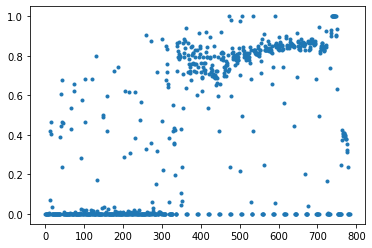

In [ ]:
plt.plot(X[100],'.')                                                            #plotting it with dots

(array([386.,   8.,  21.,  10.,  16.,   8.,  30.,  72., 187.,  46.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

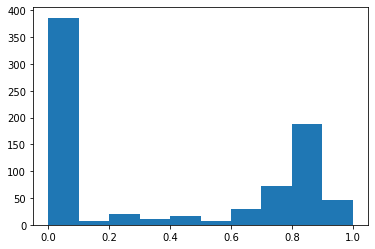

In [ ]:
plt.hist(X[0])                                                                  #creating a histogram

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'     #importing a url
wget.download(url,"W.data")                                                     #downloading the data

'W (1).data'

In [ ]:
W = torch.load("W.data")                                                        #getting the data and using W to show what it is

In [ ]:
W.shape                                                                         #the array which is the shape

torch.Size([784, 10])

In [ ]:
X.shape                                                                         #same thing but with X

torch.Size([60000, 784])

In [ ]:
def plot(x):                                                                    #plotting new things
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show()

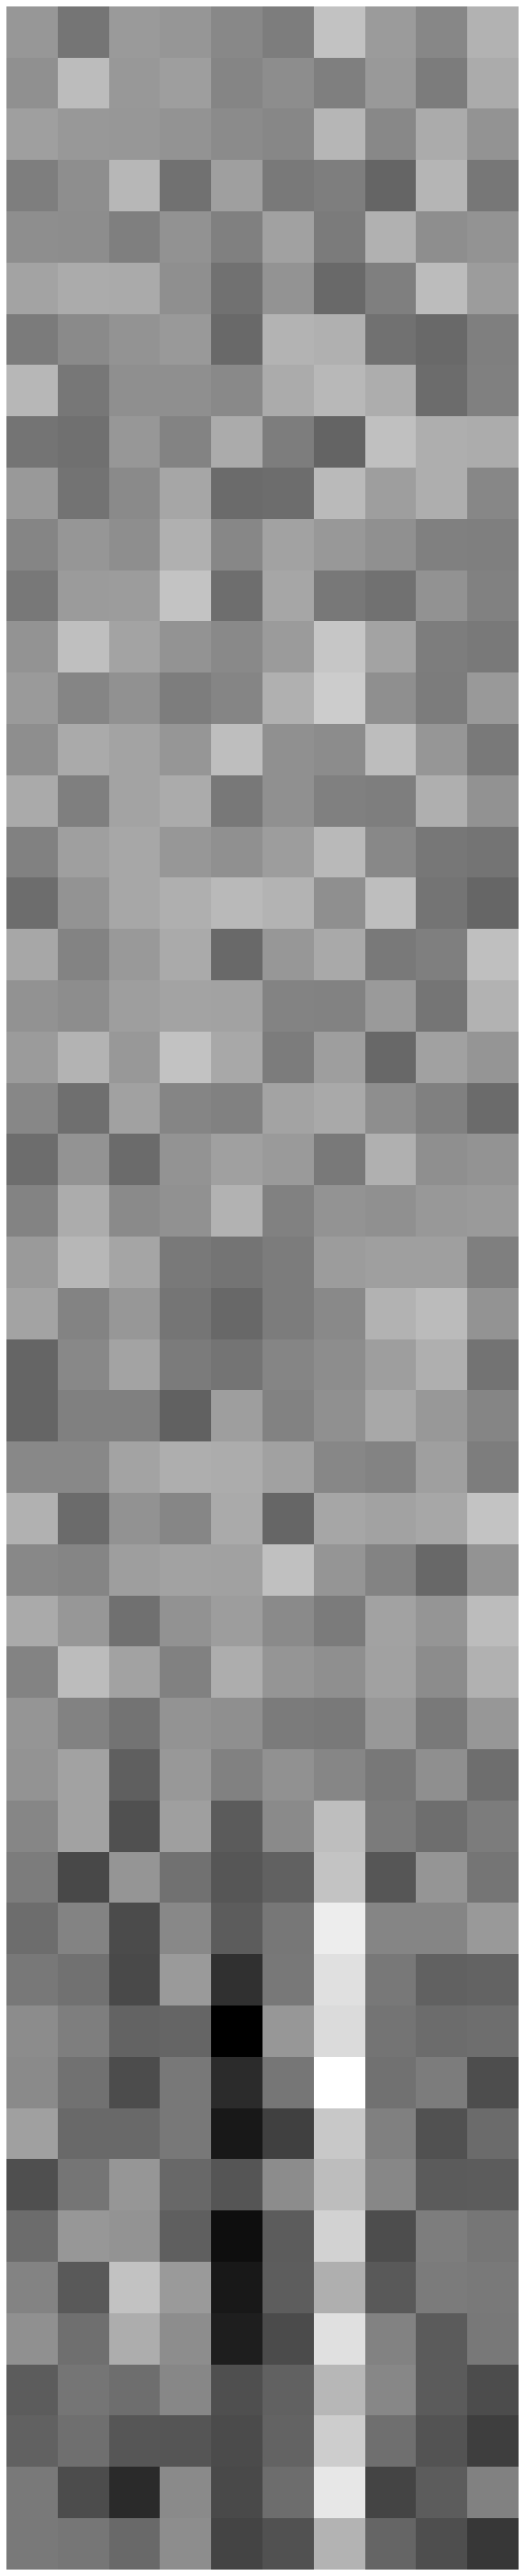

In [ ]:
plot(W[0:50,:10])                                                               #the plot 

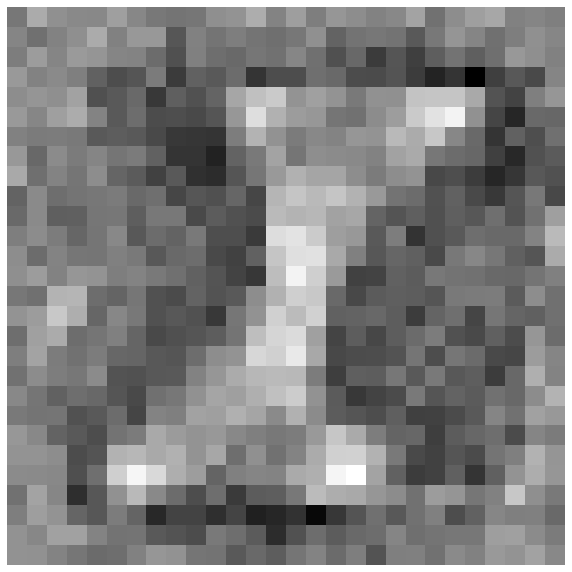

In [ ]:
plot(W[:,1].reshape(28,28))                                                     #the plot but its shape is becoming more defined

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
x,y = get_batch('train')                                                        #what x and y equal that was stated above

In [ ]:
x.shape                                                                         #numbers

torch.Size([1000, 784])

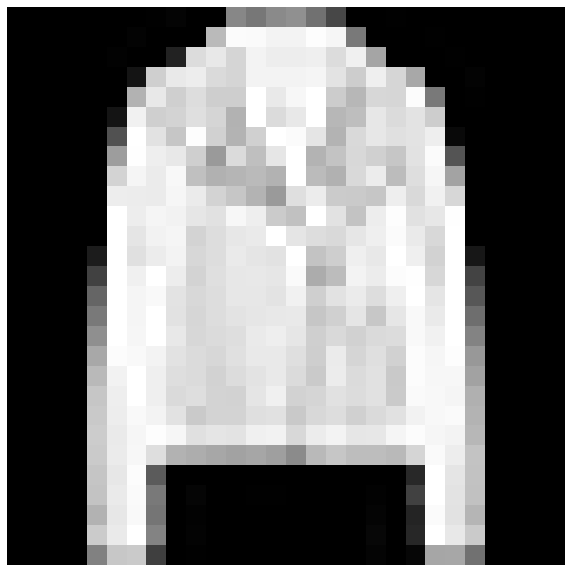

In [ ]:
plot(x[0].reshape(28,28))                                                       #the plot which is a better image

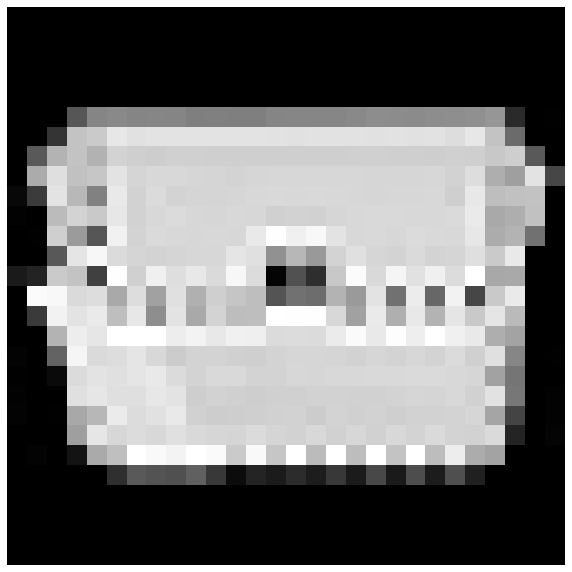

In [ ]:
plot(x[1].reshape(28,28))                                                       #a new image but maybe it is zoomed in

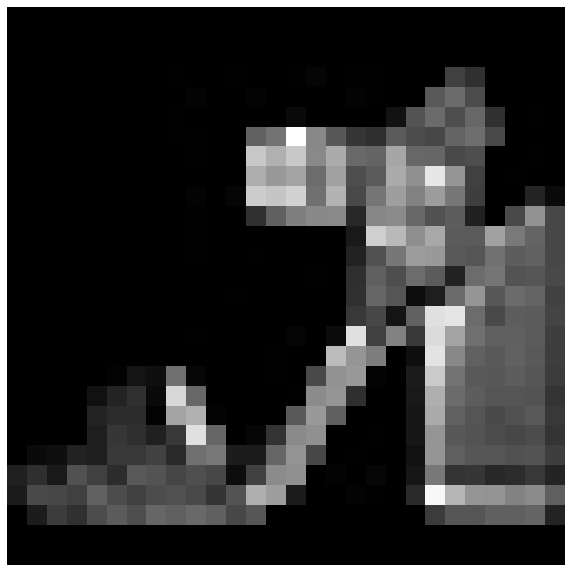

In [ ]:
plot(x[2].reshape(28,28))                                                       #another image

In [ ]:
y                                                                               #what y is equal to

tensor([4., 8., 5., 0., 4., 6., 3., 1., 9., 7., 6., 2., 4., 7., 8., 0., 7., 6.,
        0., 5., 7., 8., 5., 0., 2., 4., 1., 0., 3., 3., 0., 6., 3., 1., 3., 0.,
        5., 7., 8., 4., 3., 5., 9., 0., 6., 3., 6., 8., 1., 2., 8., 8., 0., 6.,
        2., 8., 2., 2., 5., 5., 1., 3., 1., 9., 5., 0., 6., 6., 4., 4., 8., 8.,
        1., 3., 3., 0., 5., 1., 9., 9., 2., 2., 0., 9., 7., 8., 2., 2., 3., 0.,
        3., 2., 5., 7., 2., 7., 1., 4., 7., 6., 4., 5., 6., 4., 9., 6., 5., 3.,
        4., 2., 0., 6., 7., 8., 6., 4., 7., 3., 7., 2., 1., 4., 7., 8., 8., 0.,
        8., 5., 5., 9., 4., 1., 2., 4., 7., 4., 4., 6., 3., 7., 2., 4., 0., 3.,
        1., 3., 7., 0., 6., 8., 3., 8., 5., 7., 0., 4., 8., 0., 4., 6., 7., 9.,
        0., 5., 8., 3., 6., 0., 3., 4., 8., 6., 8., 3., 0., 4., 7., 8., 4., 7.,
        5., 4., 9., 3., 9., 5., 2., 4., 0., 2., 3., 1., 4., 0., 6., 9., 9., 7.,
        1., 5., 7., 1., 9., 7., 6., 7., 4., 7., 4., 8., 8., 7., 8., 0., 5., 8.,
        7., 8., 6., 5., 0., 6., 4., 8., 

In [ ]:
x.shape, W.shape                                                                #producing what these equal

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [ ]:
torch.matmul(x,W).shape

torch.Size([1000, 10])

In [ ]:
(x@W).shape

torch.Size([1000, 10])

In [ ]:
%%timeit
x@W

21 µs ± 435 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
X@W

tensor([[ -9.1355, -26.5981,   5.1709,  ..., -29.5724, -15.9528, -30.1074],
        [-28.9095, -42.6421, -18.8967,  ..., -11.8924, -18.0746, -21.6941],
        [ -7.1658, -10.6776,  -1.3747,  ...,  -4.1579,  -5.6479,  -3.0956],
        ...,
        [-13.8366, -21.5116,  -3.3438,  ...,  -2.4351,  -7.5723,  -4.4591],
        [ -7.7420, -15.5898,  -9.8953,  ...,  -2.0989,  -6.3501,  -7.9436],
        [ -1.9665,  -8.2239,   4.0209,  ...,  -5.0965,  -8.9947,  -6.2918]],
       device='cuda:0', grad_fn=<MmBackward0>)

https://eleif.net/clicktimer.html

In [ ]:
x@W

tensor([[-14.0026, -41.8160,   1.6292,  ..., -22.0355, -22.2251, -19.9195],
        [ -9.8940, -42.9887,  -2.3033,  ..., -16.5945, -15.9640, -40.8146],
        [ -0.7557, -13.9218,  -1.0461,  ...,  -4.4784, -10.2016,  -8.2387],
        ...,
        [ -2.7820, -11.1787,   3.8858,  ...,  -7.7057, -11.3102,  -8.4495],
        [-10.2757, -33.3701,  -4.6198,  ...,  -9.2185, -10.4752,  -7.2552],
        [ -5.7822, -19.9258,   3.2517,  ..., -17.4497, -10.4181, -15.8637]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
y2 = x@W 

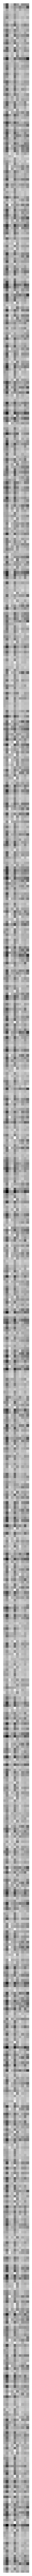

In [ ]:
plot(y2)                                                                        #a very long plot

In [ ]:
y                                                                               #from this last one this is what y equals to

tensor([4., 8., 5., 0., 4., 6., 3., 1., 9., 7., 6., 2., 4., 7., 8., 0., 7., 6.,
        0., 5., 7., 8., 5., 0., 2., 4., 1., 0., 3., 3., 0., 6., 3., 1., 3., 0.,
        5., 7., 8., 4., 3., 5., 9., 0., 6., 3., 6., 8., 1., 2., 8., 8., 0., 6.,
        2., 8., 2., 2., 5., 5., 1., 3., 1., 9., 5., 0., 6., 6., 4., 4., 8., 8.,
        1., 3., 3., 0., 5., 1., 9., 9., 2., 2., 0., 9., 7., 8., 2., 2., 3., 0.,
        3., 2., 5., 7., 2., 7., 1., 4., 7., 6., 4., 5., 6., 4., 9., 6., 5., 3.,
        4., 2., 0., 6., 7., 8., 6., 4., 7., 3., 7., 2., 1., 4., 7., 8., 8., 0.,
        8., 5., 5., 9., 4., 1., 2., 4., 7., 4., 4., 6., 3., 7., 2., 4., 0., 3.,
        1., 3., 7., 0., 6., 8., 3., 8., 5., 7., 0., 4., 8., 0., 4., 6., 7., 9.,
        0., 5., 8., 3., 6., 0., 3., 4., 8., 6., 8., 3., 0., 4., 7., 8., 4., 7.,
        5., 4., 9., 3., 9., 5., 2., 4., 0., 2., 3., 1., 4., 0., 6., 9., 9., 7.,
        1., 5., 7., 1., 9., 7., 6., 7., 4., 7., 4., 8., 8., 7., 8., 0., 5., 8.,
        7., 8., 6., 5., 0., 6., 4., 8., 

In [ ]:
one_hot(y)

/usr/local/lib/python3.7/dist-packages/mpcr/__init__.py:144: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

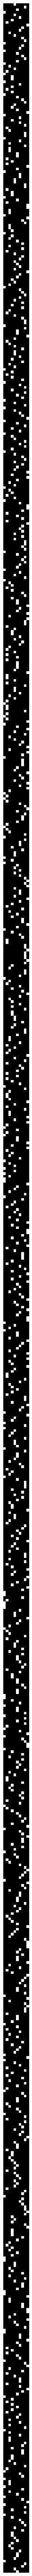

In [ ]:
plot(one_hot(y))

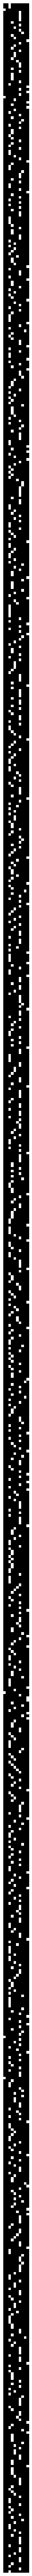

In [ ]:
plot(one_hot(torch.argmax(y2,1)))

In [ ]:
y

tensor([4., 8., 5., 0., 4., 6., 3., 1., 9., 7., 6., 2., 4., 7., 8., 0., 7., 6.,
        0., 5., 7., 8., 5., 0., 2., 4., 1., 0., 3., 3., 0., 6., 3., 1., 3., 0.,
        5., 7., 8., 4., 3., 5., 9., 0., 6., 3., 6., 8., 1., 2., 8., 8., 0., 6.,
        2., 8., 2., 2., 5., 5., 1., 3., 1., 9., 5., 0., 6., 6., 4., 4., 8., 8.,
        1., 3., 3., 0., 5., 1., 9., 9., 2., 2., 0., 9., 7., 8., 2., 2., 3., 0.,
        3., 2., 5., 7., 2., 7., 1., 4., 7., 6., 4., 5., 6., 4., 9., 6., 5., 3.,
        4., 2., 0., 6., 7., 8., 6., 4., 7., 3., 7., 2., 1., 4., 7., 8., 8., 0.,
        8., 5., 5., 9., 4., 1., 2., 4., 7., 4., 4., 6., 3., 7., 2., 4., 0., 3.,
        1., 3., 7., 0., 6., 8., 3., 8., 5., 7., 0., 4., 8., 0., 4., 6., 7., 9.,
        0., 5., 8., 3., 6., 0., 3., 4., 8., 6., 8., 3., 0., 4., 7., 8., 4., 7.,
        5., 4., 9., 3., 9., 5., 2., 4., 0., 2., 3., 1., 4., 0., 6., 9., 9., 7.,
        1., 5., 7., 1., 9., 7., 6., 7., 4., 7., 4., 8., 8., 7., 8., 0., 5., 8.,
        7., 8., 6., 5., 0., 6., 4., 8., 

In [ ]:
torch.argmax(y2,1)

tensor([2, 2, 0, 6, 6, 6, 6, 3, 6, 4, 6, 7, 3, 4, 9, 6, 4, 3, 6, 4, 4, 3, 5, 6,
        6, 3, 6, 3, 3, 3, 6, 2, 9, 6, 9, 6, 0, 4, 9, 3, 9, 4, 2, 6, 3, 7, 6, 2,
        6, 3, 3, 2, 3, 6, 3, 2, 6, 2, 2, 4, 6, 9, 3, 2, 2, 7, 6, 6, 3, 6, 2, 2,
        6, 9, 3, 6, 2, 6, 2, 6, 3, 6, 6, 2, 2, 2, 3, 6, 3, 3, 6, 6, 2, 4, 2, 4,
        3, 2, 5, 3, 3, 4, 9, 2, 6, 6, 2, 9, 3, 3, 6, 2, 4, 2, 3, 9, 4, 6, 2, 6,
        3, 2, 2, 2, 9, 6, 2, 8, 3, 2, 3, 6, 6, 9, 2, 6, 2, 2, 9, 2, 6, 3, 9, 6,
        6, 7, 4, 3, 3, 2, 6, 2, 4, 2, 3, 2, 7, 3, 3, 3, 4, 2, 6, 2, 7, 6, 3, 6,
        6, 6, 2, 2, 9, 3, 9, 2, 4, 9, 6, 4, 2, 3, 2, 3, 2, 5, 7, 7, 6, 6, 6, 6,
        3, 6, 6, 2, 2, 4, 3, 6, 4, 6, 2, 2, 6, 2, 3, 4, 2, 9, 2, 2, 4, 3, 2, 2,
        4, 2, 7, 4, 6, 3, 3, 9, 7, 3, 3, 3, 7, 4, 2, 9, 4, 5, 2, 2, 2, 2, 2, 6,
        2, 9, 6, 2, 6, 9, 7, 6, 4, 2, 6, 3, 3, 6, 2, 6, 4, 4, 4, 3, 2, 6, 6, 6,
        3, 9, 3, 6, 6, 6, 3, 6, 6, 3, 6, 2, 3, 6, 6, 2, 6, 2, 2, 3, 4, 6, 9, 4,
        3, 2, 6, 2, 4, 3, 2, 2, 4, 2, 2,

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b

tensor(0.0690, device='cuda:0')

In [ ]:
X.shape                                                                         #the array of numbers

torch.Size([60000, 784])

In [ ]:
X@W

tensor([[ -9.1355, -26.5981,   5.1709,  ..., -29.5724, -15.9528, -30.1074],
        [-28.9095, -42.6421, -18.8967,  ..., -11.8924, -18.0746, -21.6941],
        [ -7.1658, -10.6776,  -1.3747,  ...,  -4.1579,  -5.6479,  -3.0956],
        ...,
        [-13.8366, -21.5116,  -3.3438,  ...,  -2.4351,  -7.5723,  -4.4591],
        [ -7.7420, -15.5898,  -9.8953,  ...,  -2.0989,  -6.3501,  -7.9436],
        [ -1.9665,  -8.2239,   4.0209,  ...,  -5.0965,  -8.9947,  -6.2918]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
torch.argmax(X@W,1)

tensor([2, 6, 6,  ..., 6, 6, 2], device='cuda:0')

In [ ]:
Y

tensor([9., 0., 0.,  ..., 3., 0., 5.], device='cuda:0')

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.0777, device='cuda:0')

In [ ]:
X@W

tensor([[ -9.1355, -26.5981,   5.1709,  ..., -29.5724, -15.9528, -30.1074],
        [-28.9095, -42.6421, -18.8967,  ..., -11.8924, -18.0746, -21.6941],
        [ -7.1658, -10.6776,  -1.3747,  ...,  -4.1579,  -5.6479,  -3.0956],
        ...,
        [-13.8366, -21.5116,  -3.3438,  ...,  -2.4351,  -7.5723,  -4.4591],
        [ -7.7420, -15.5898,  -9.8953,  ...,  -2.0989,  -6.3501,  -7.9436],
        [ -1.9665,  -8.2239,   4.0209,  ...,  -5.0965,  -8.9947,  -6.2918]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
W[:,0].shape

torch.Size([784])

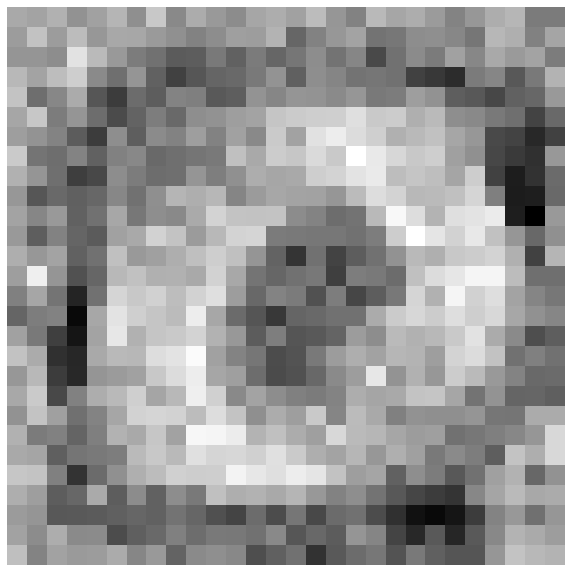

In [ ]:
plot(W[:,0].reshape(28,28))                                                     #an image is made

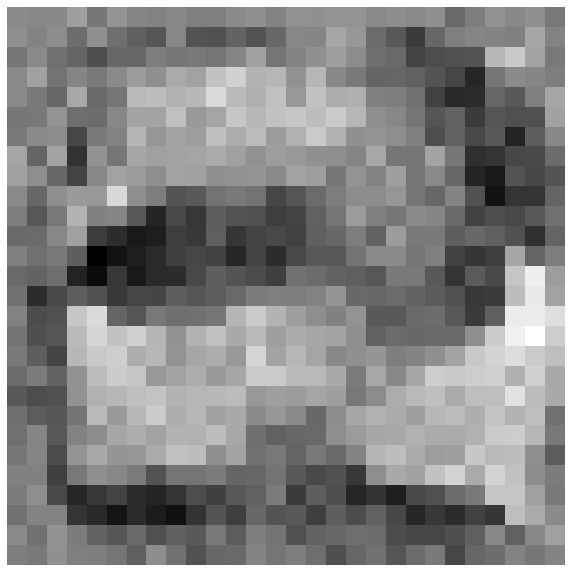

In [ ]:
plot(W[:,2].reshape(28,28))                                                     #another image is made

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
(W.T).shape

torch.Size([10, 784])

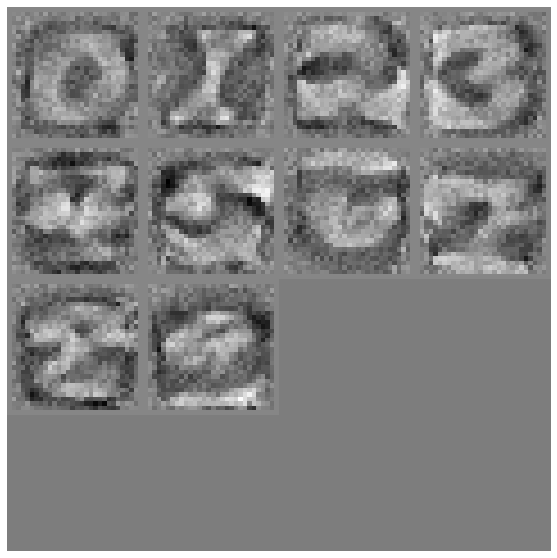

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())                    #trying to create numbers but it is very blurry

In [ ]:
###################################################

In [ ]:
%%html
<img src ='https://miro.medium.com/max/1906/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg'>

In [ ]:
%%html
<img src = 'https://miro.medium.com/max/3648/1*wz59MnXkXdWxrq_fkA2wew.png'>

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
%%html
<img src ='https://i.stack.imgur.com/fXqXs.png'>

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


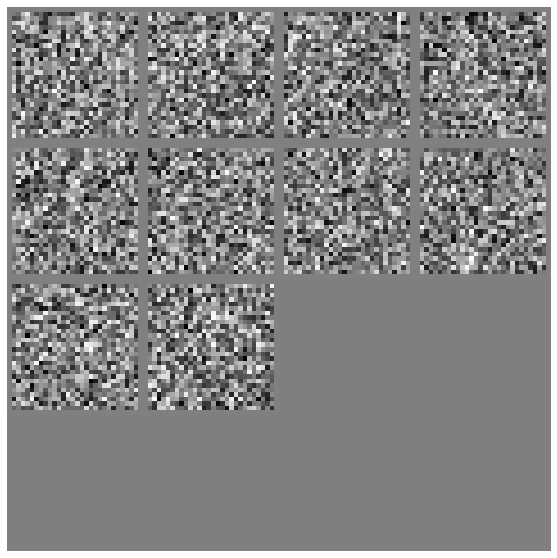

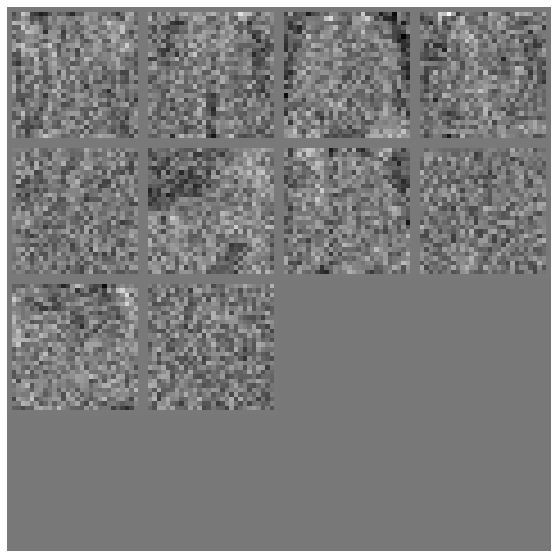

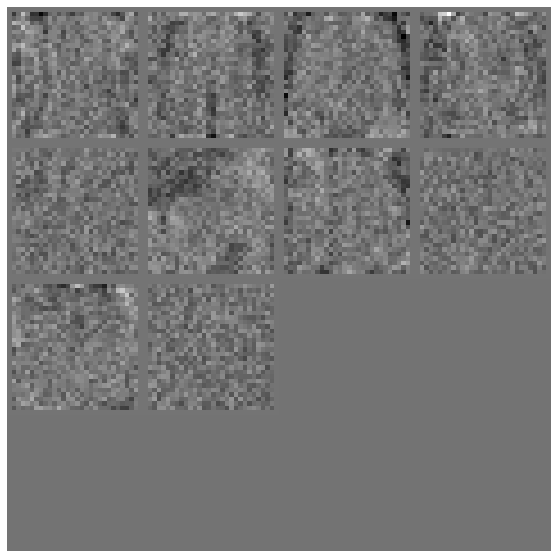

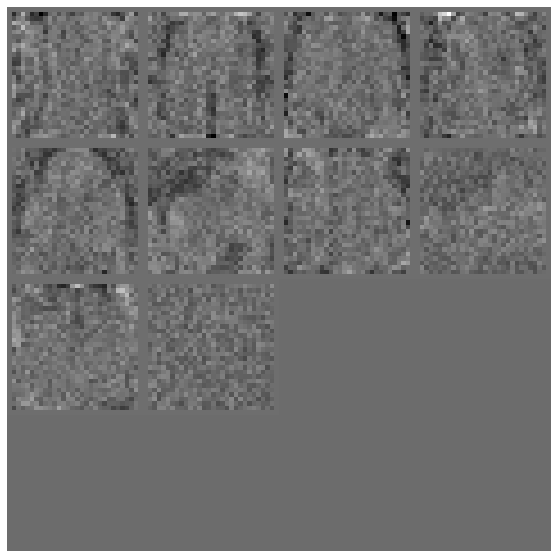

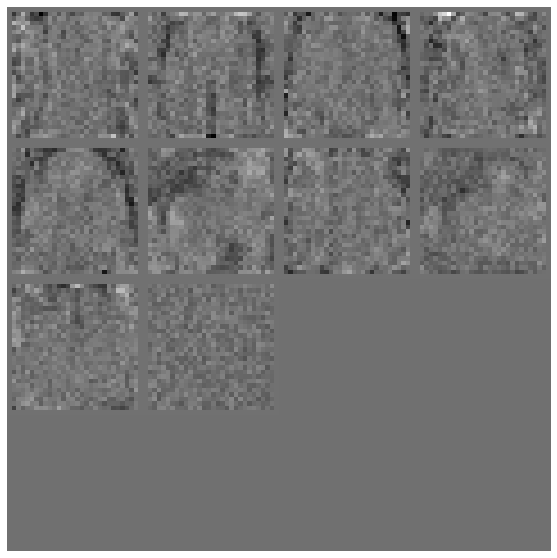

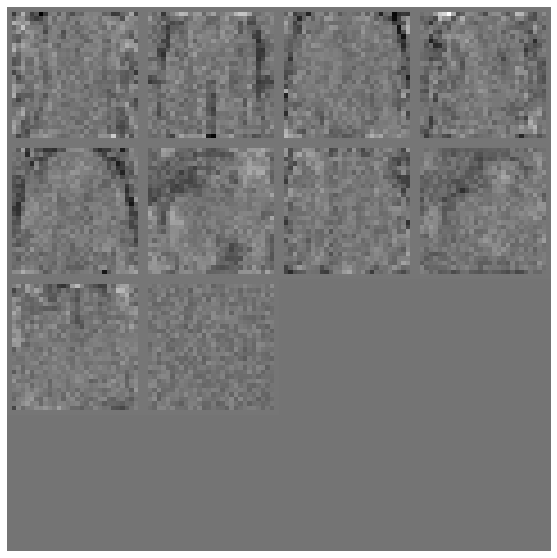

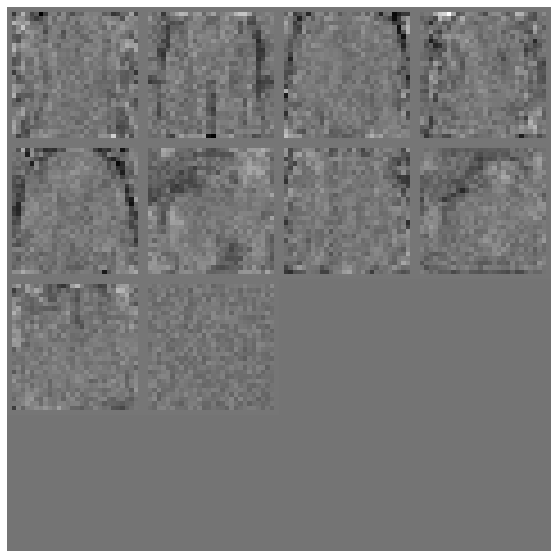

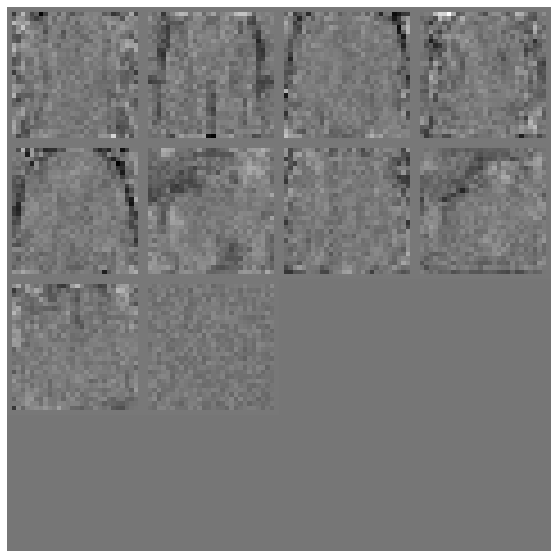

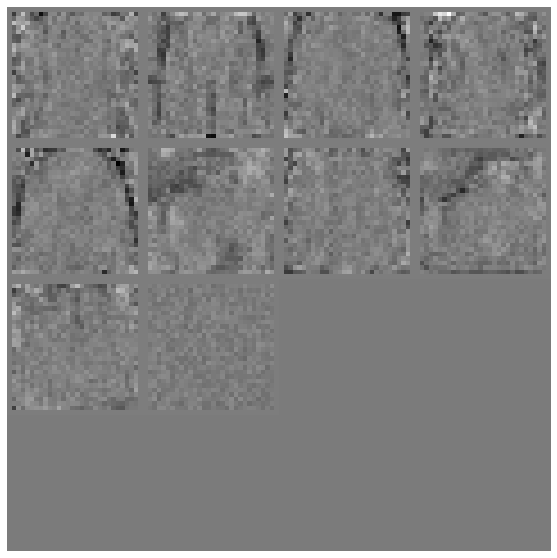

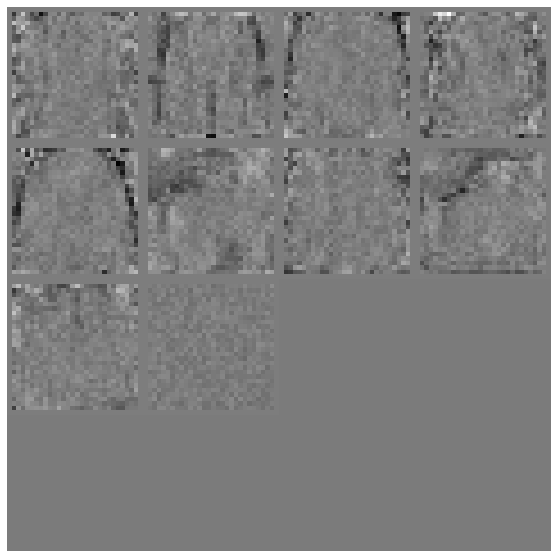

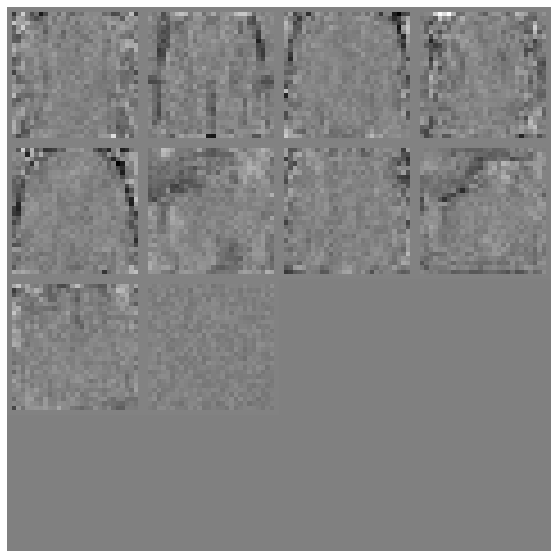

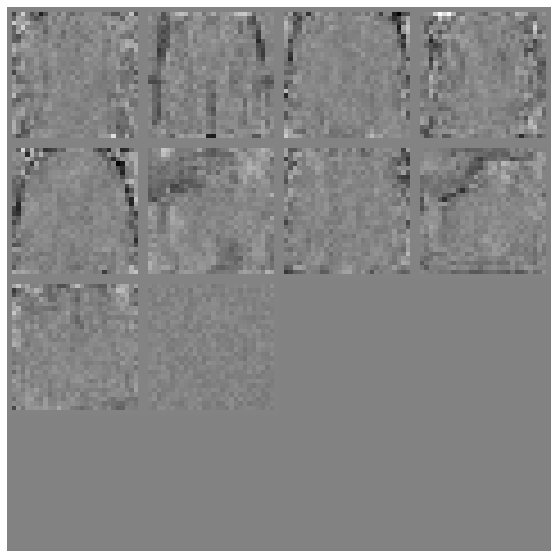

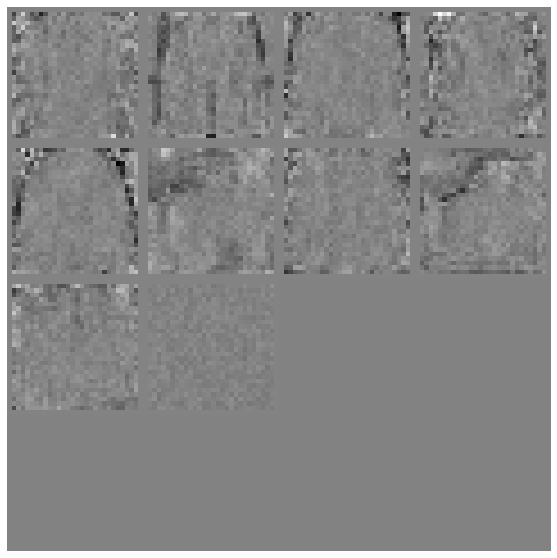

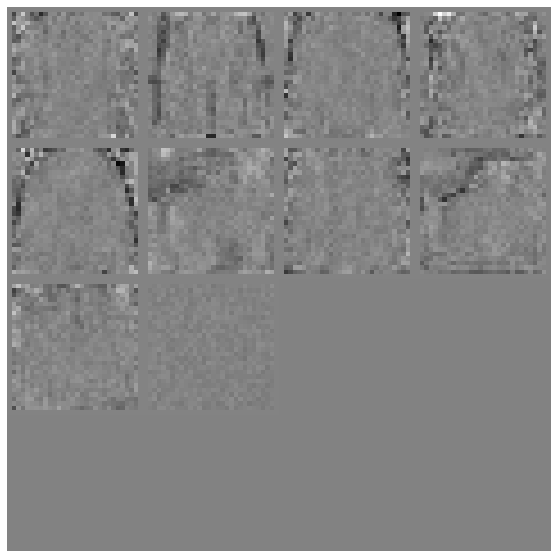

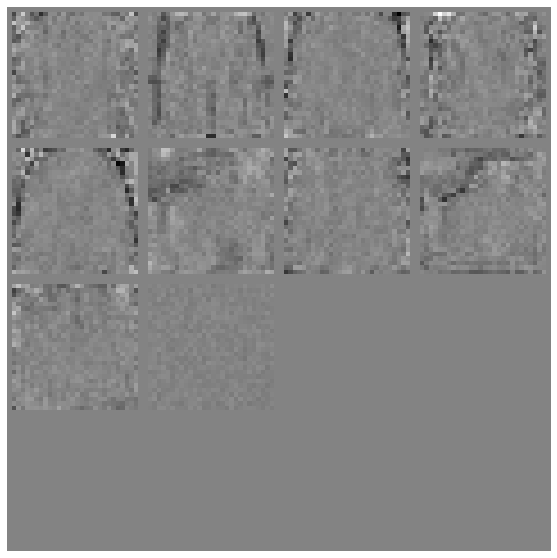

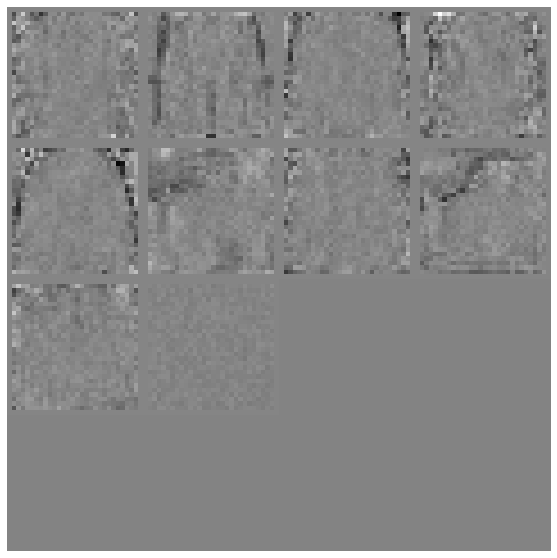

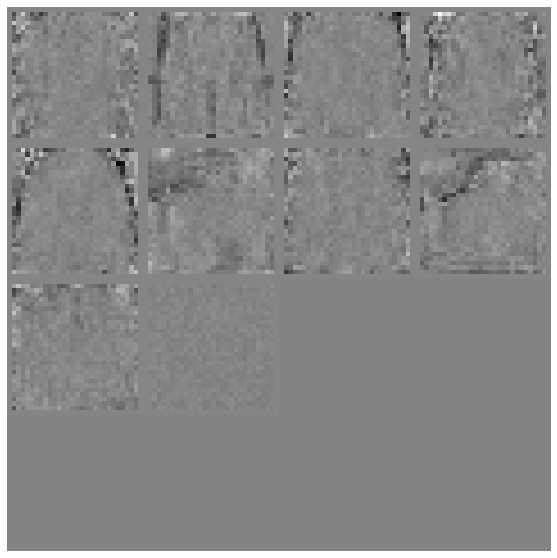

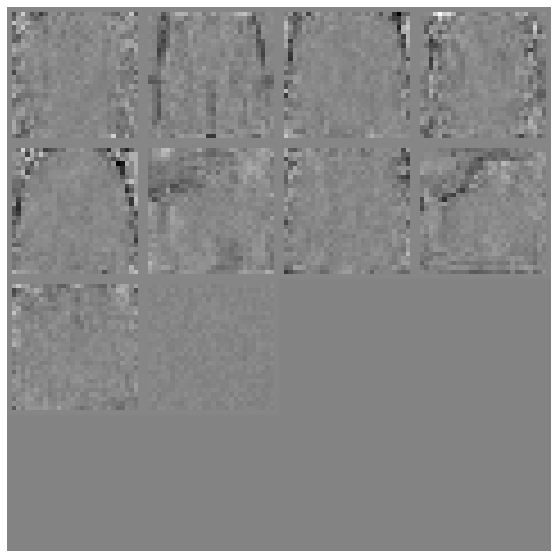

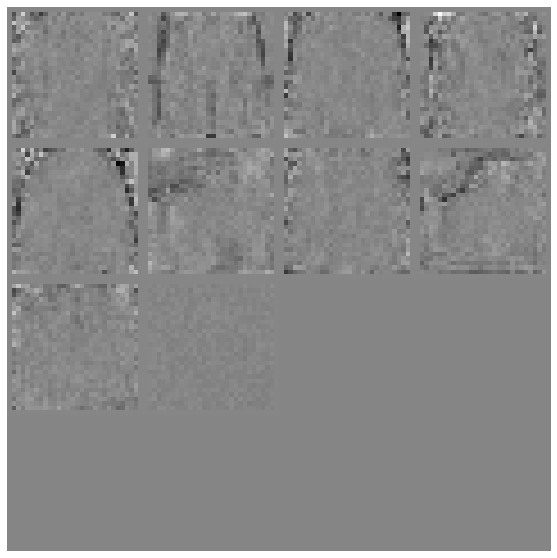

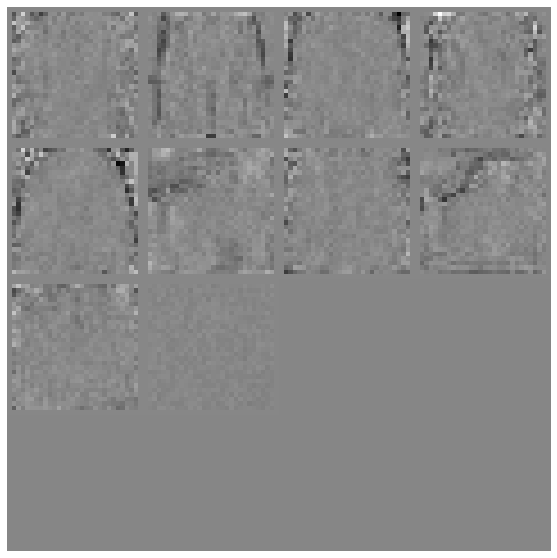

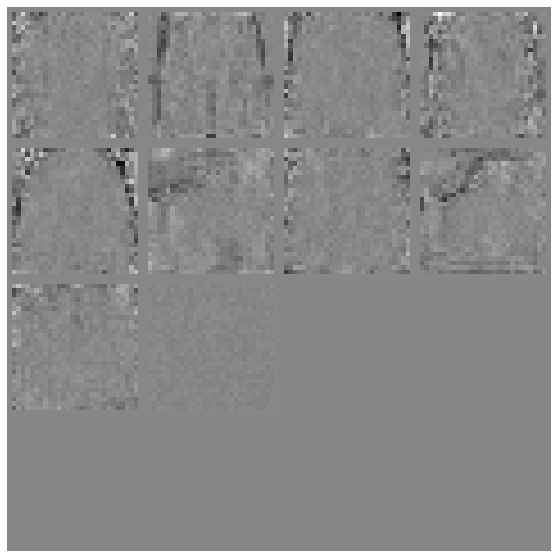

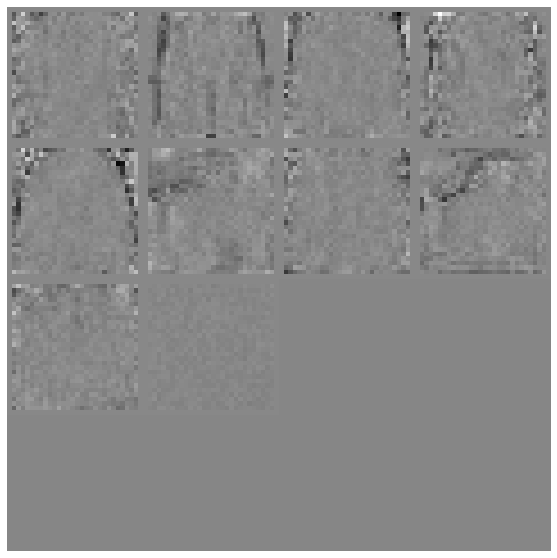

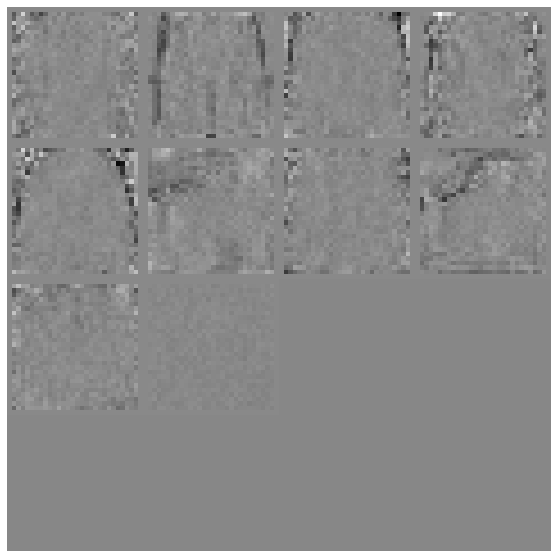

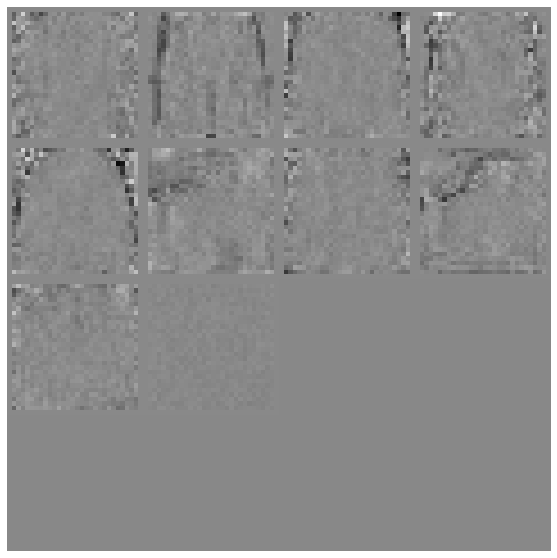

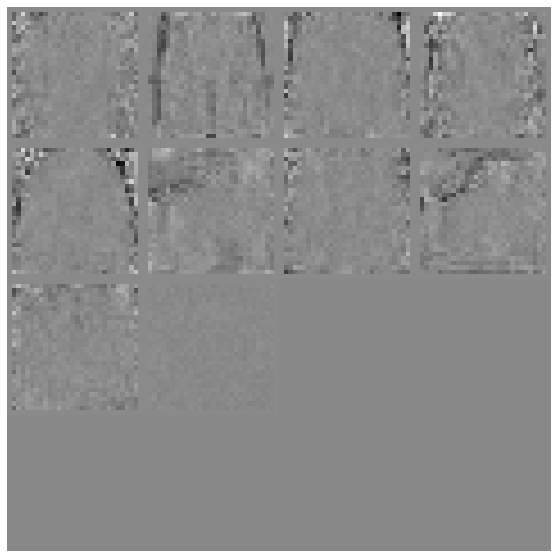

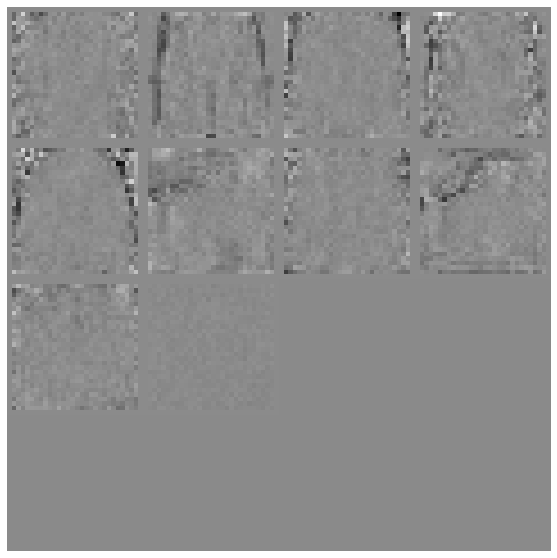

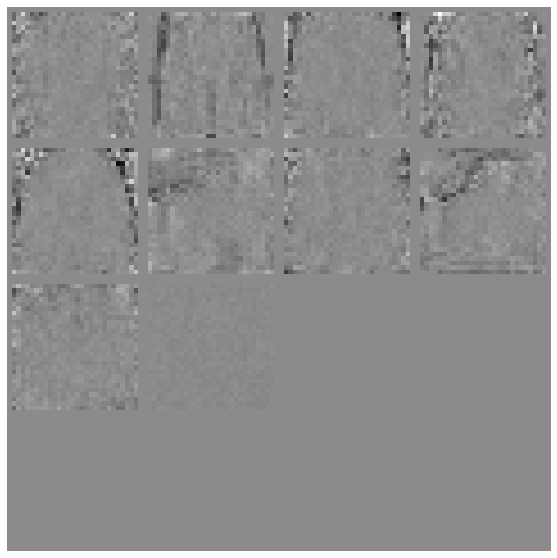

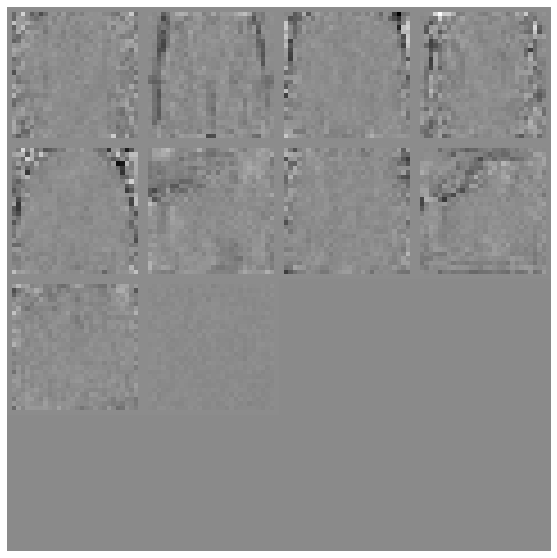

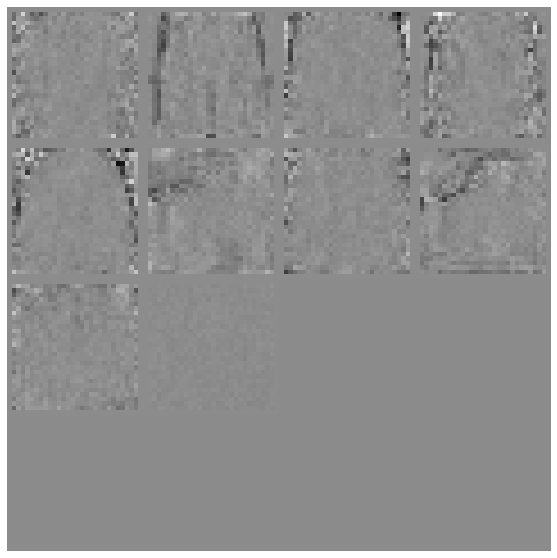

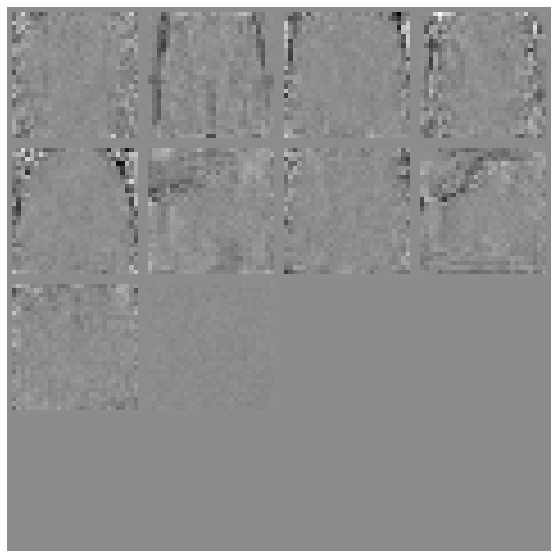

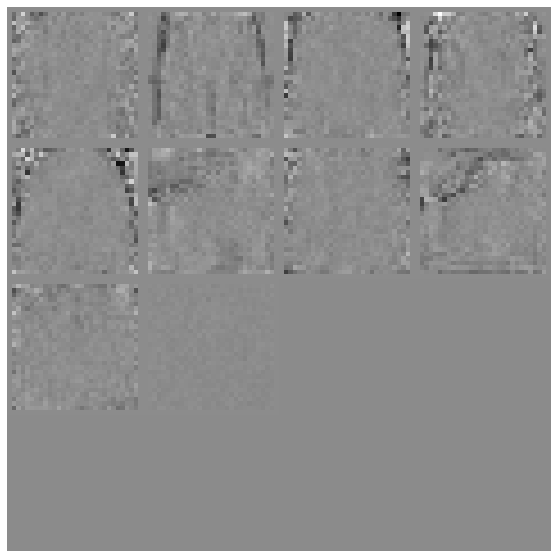

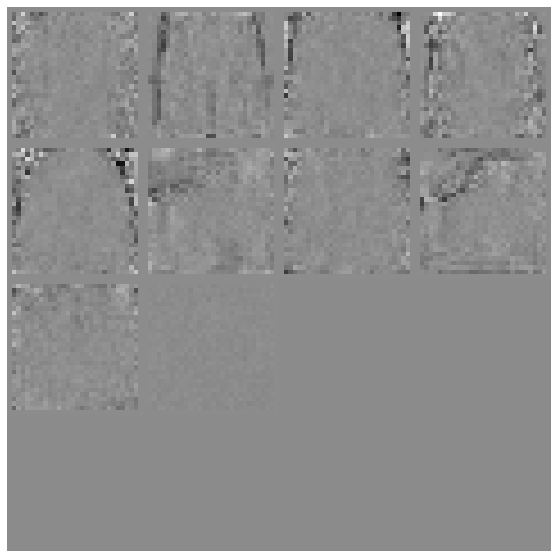

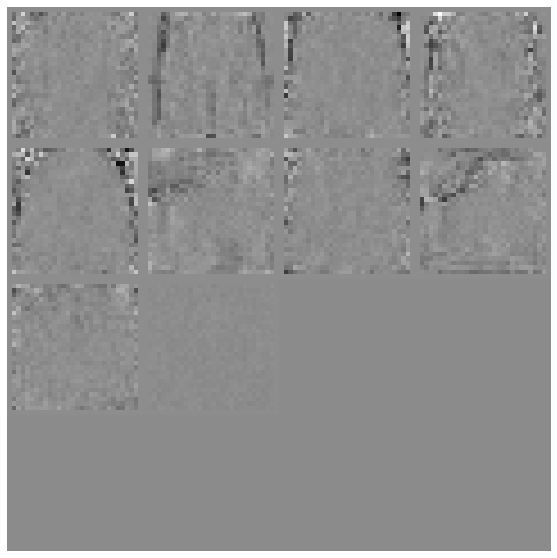

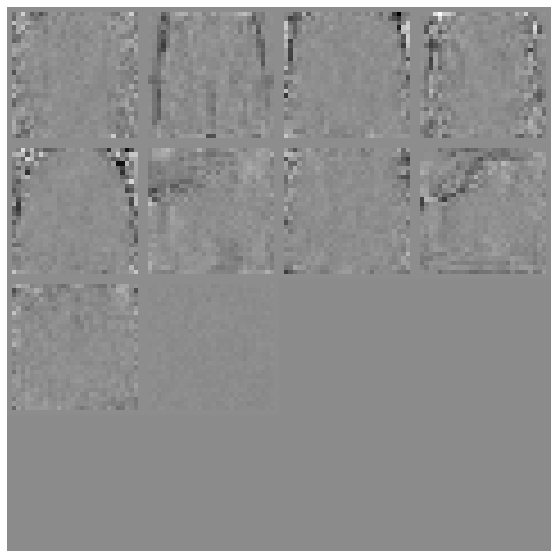

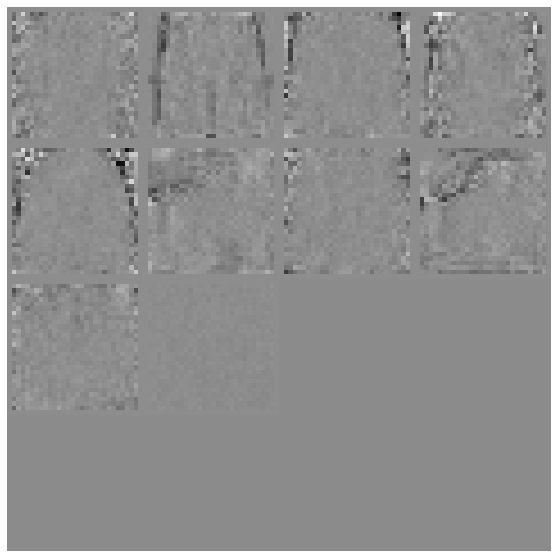

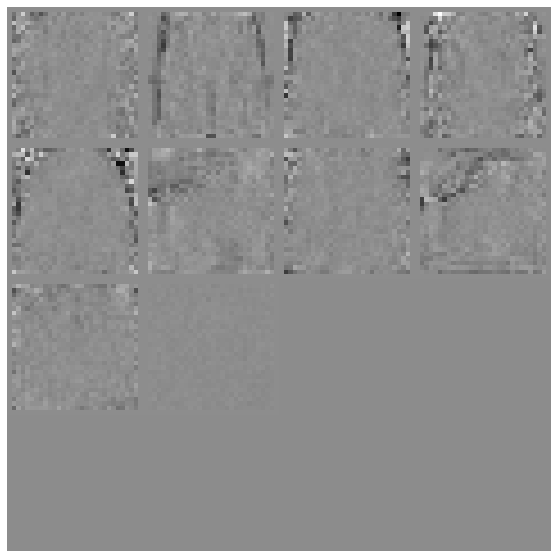

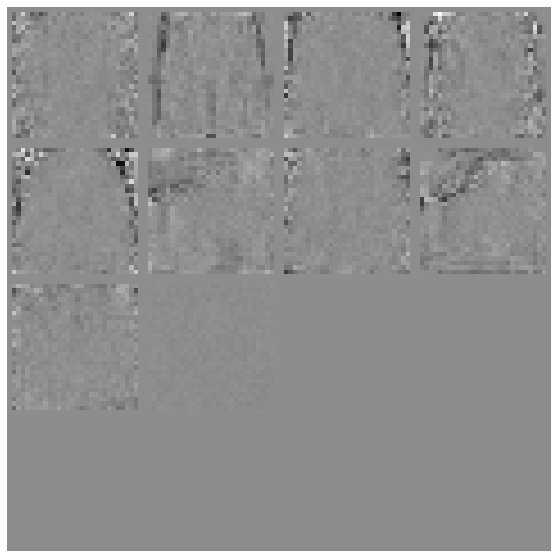

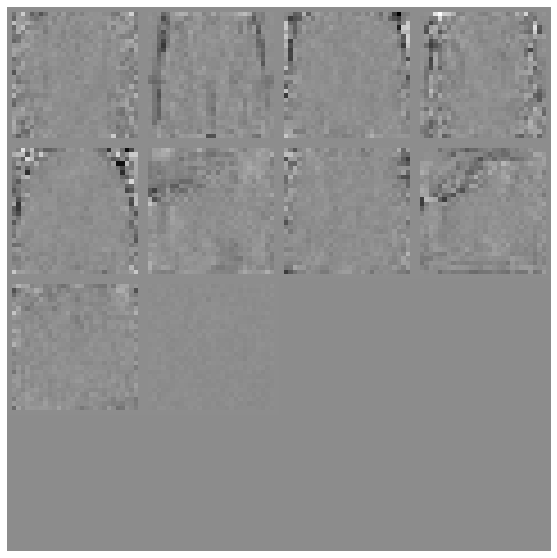

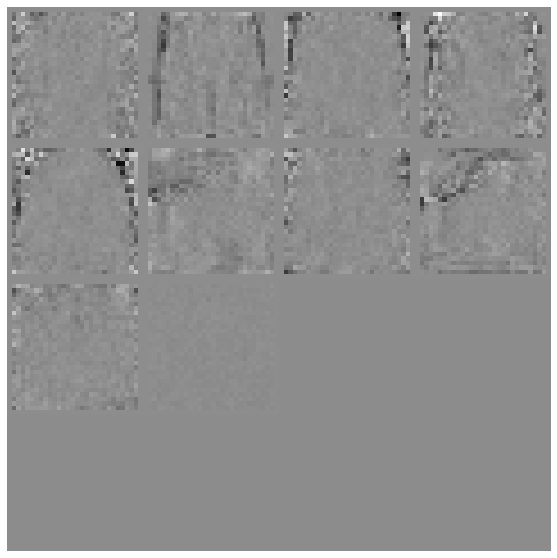

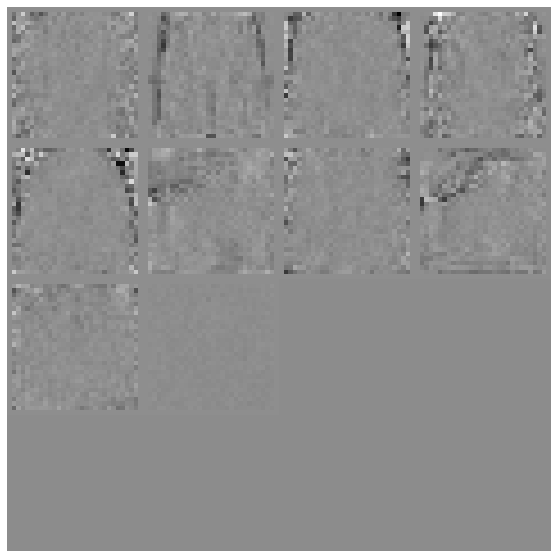

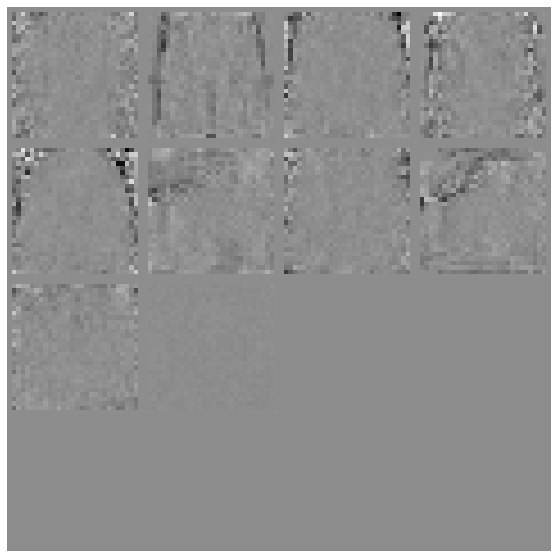

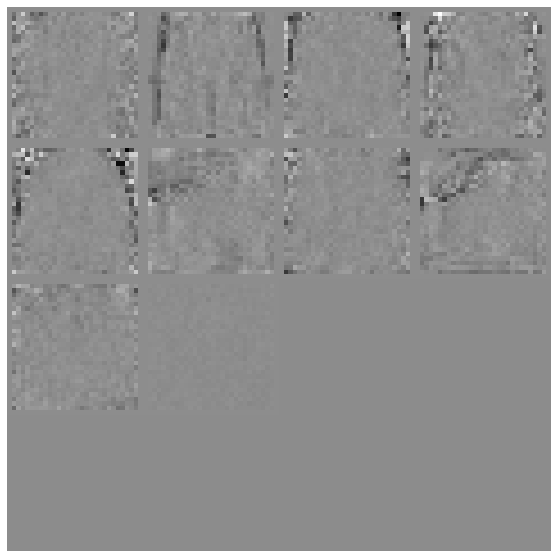

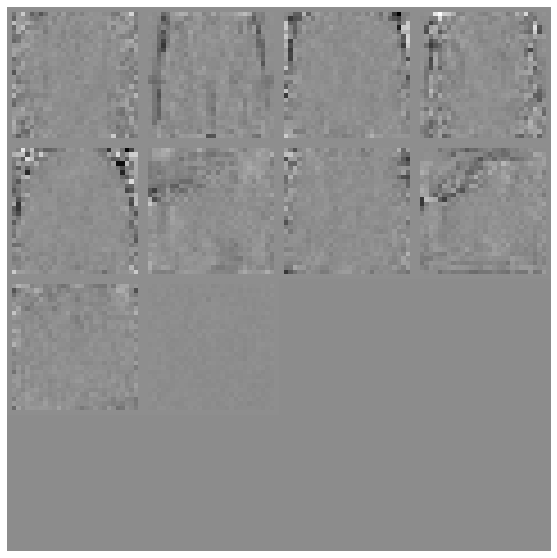

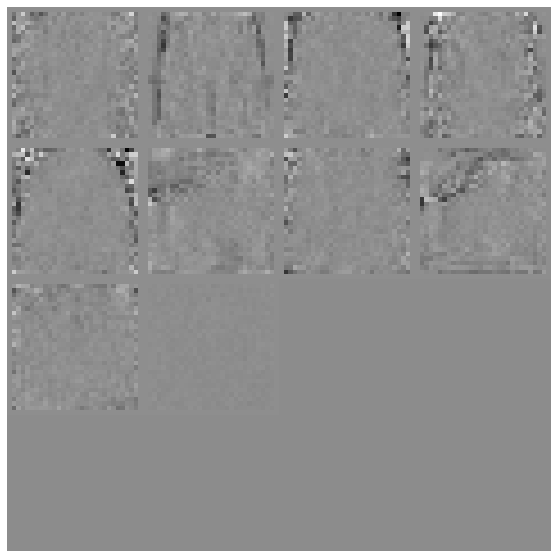

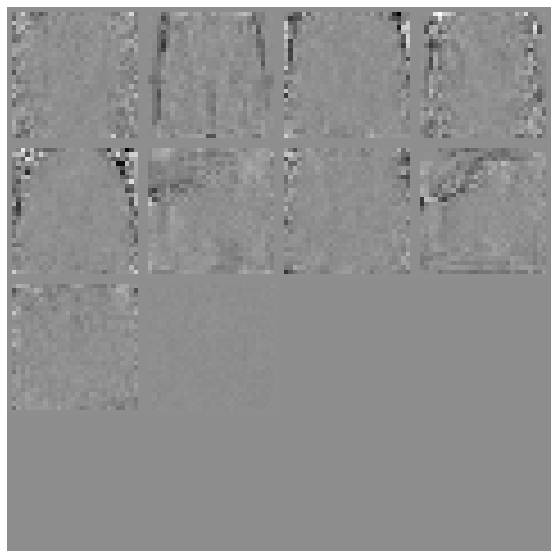

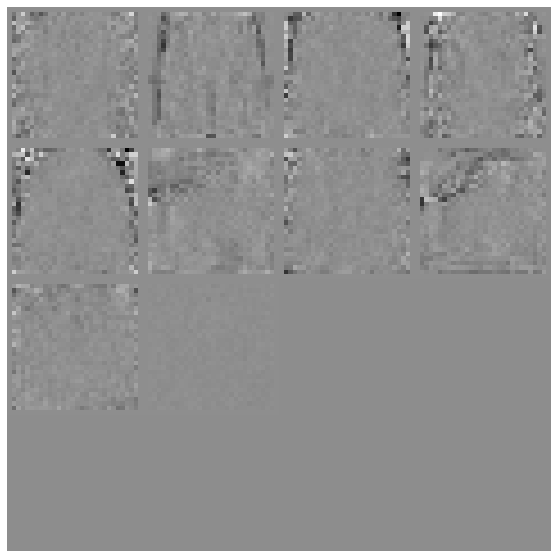

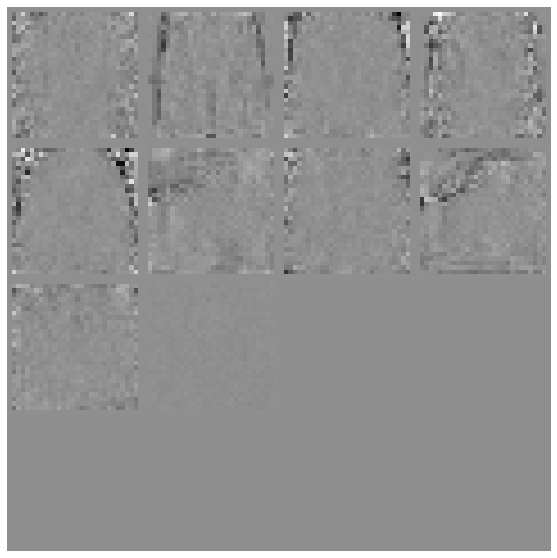

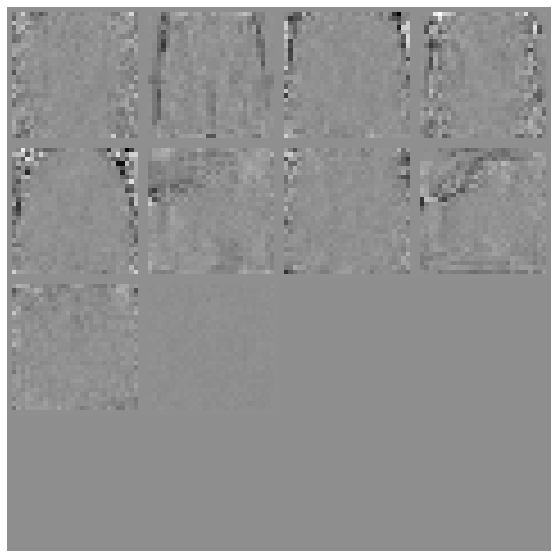

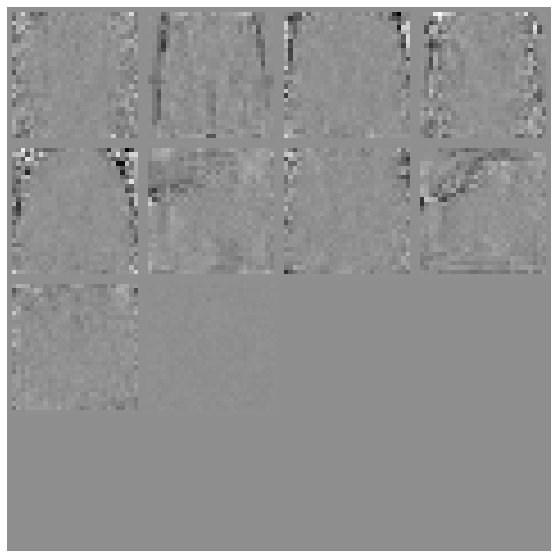

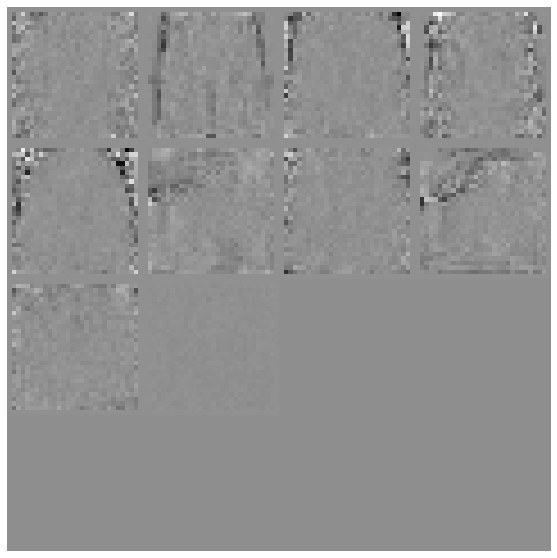

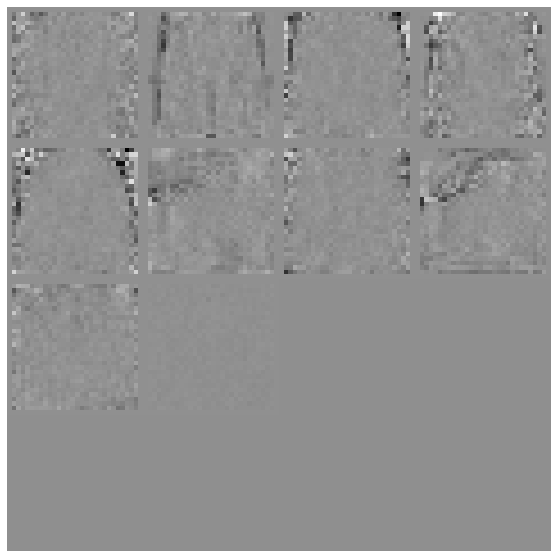

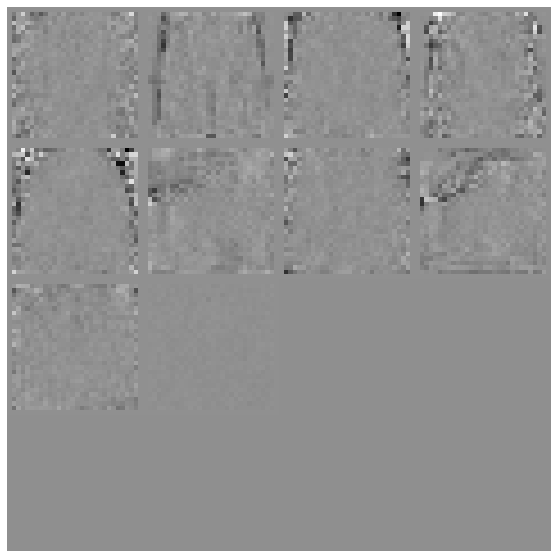

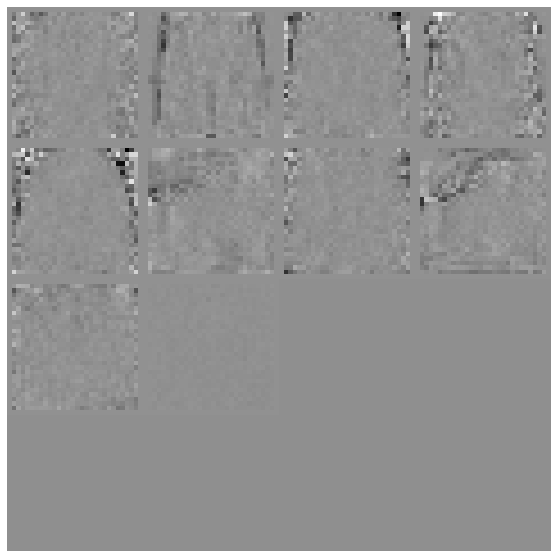

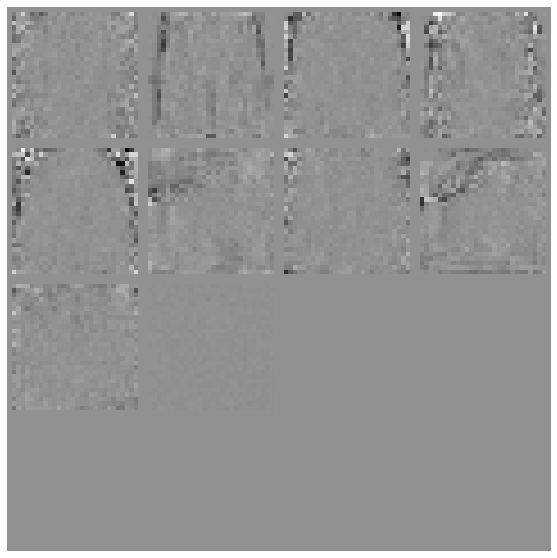

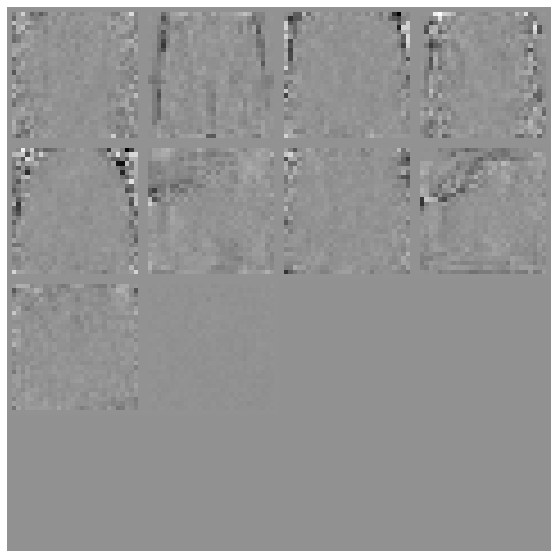

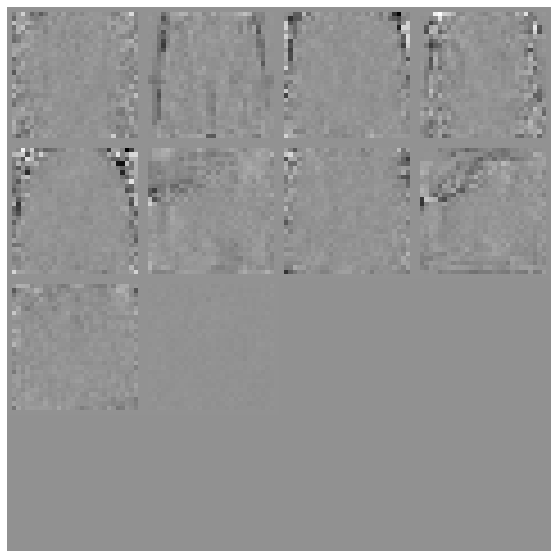

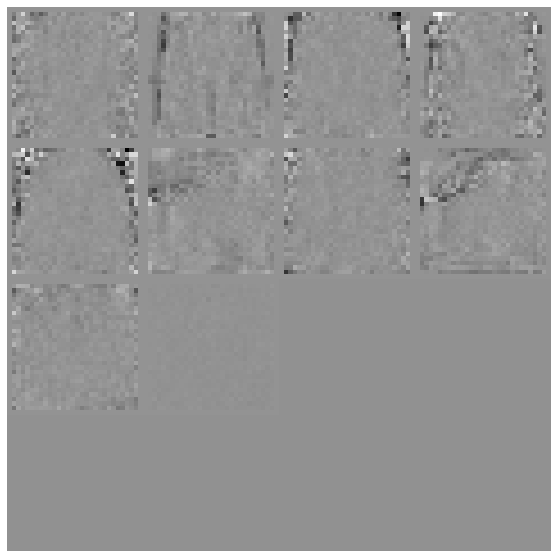

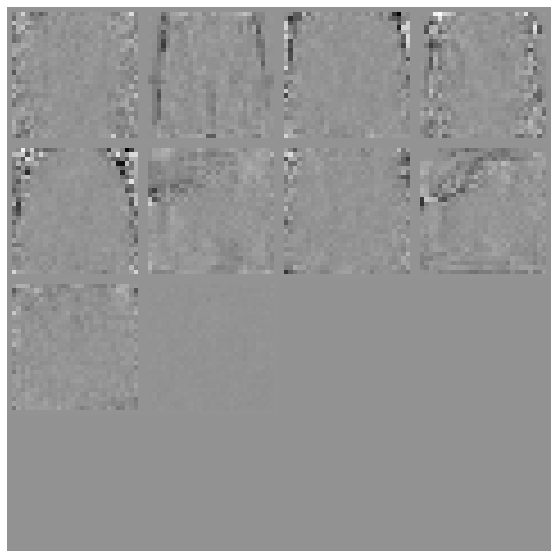

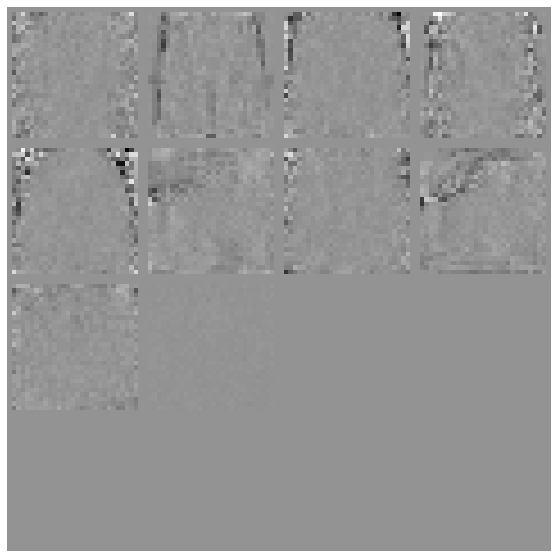

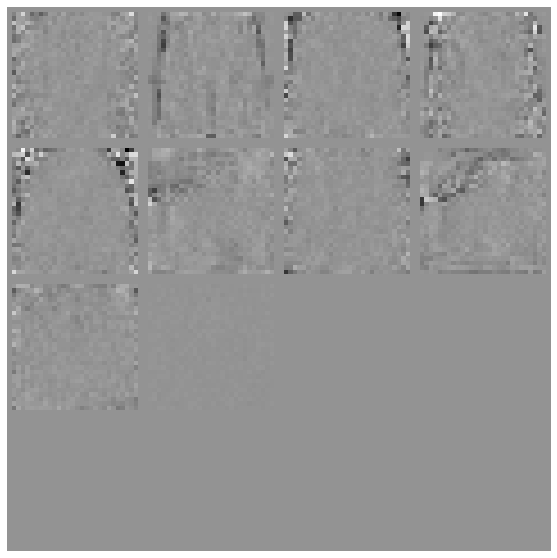

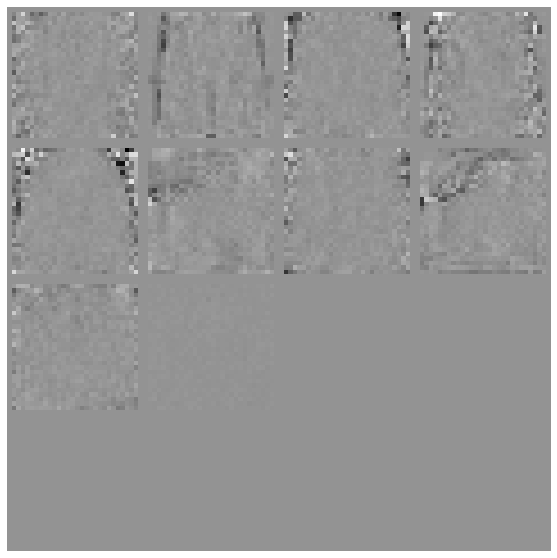

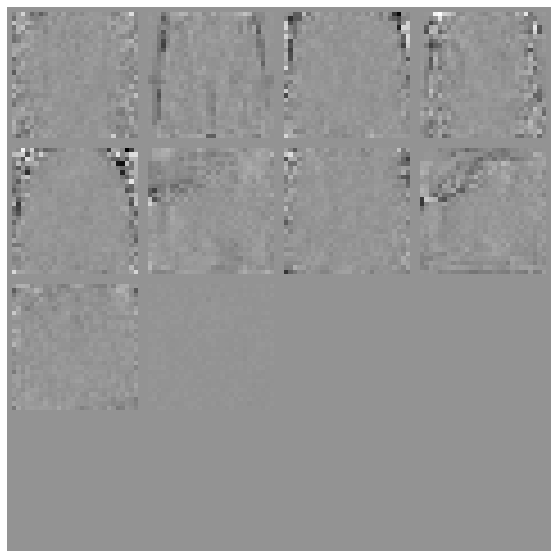

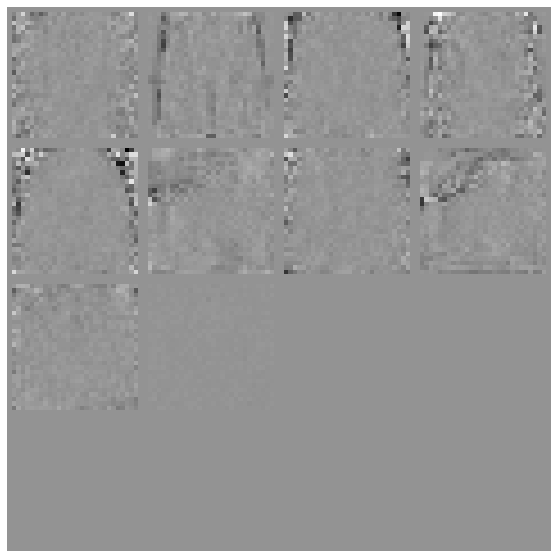

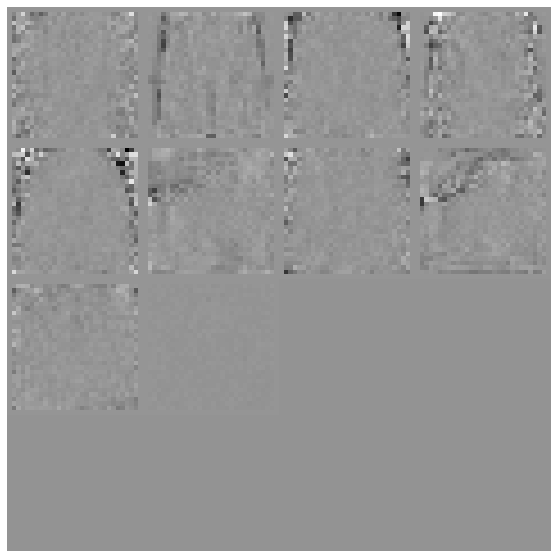

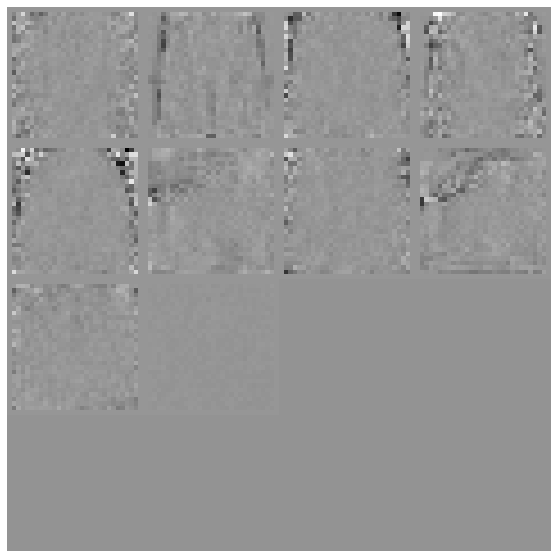

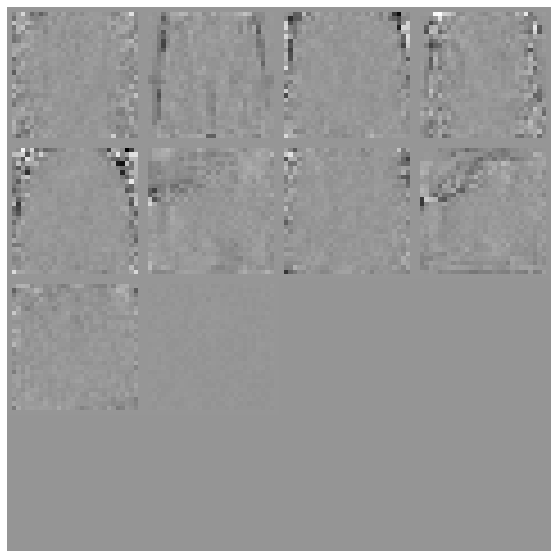

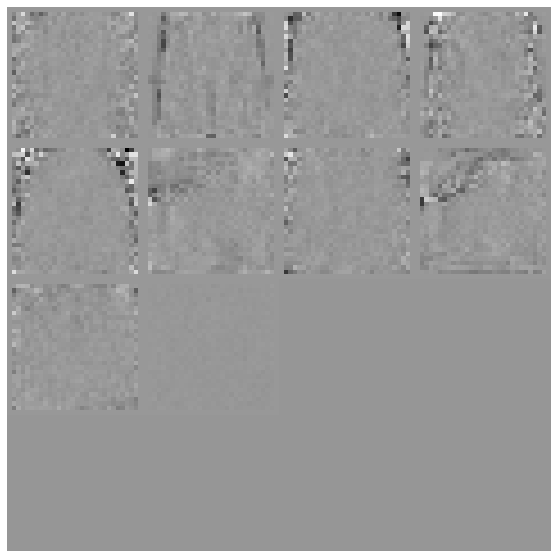

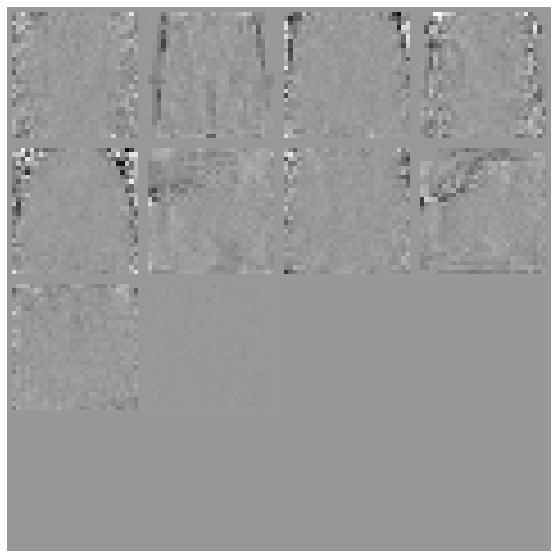

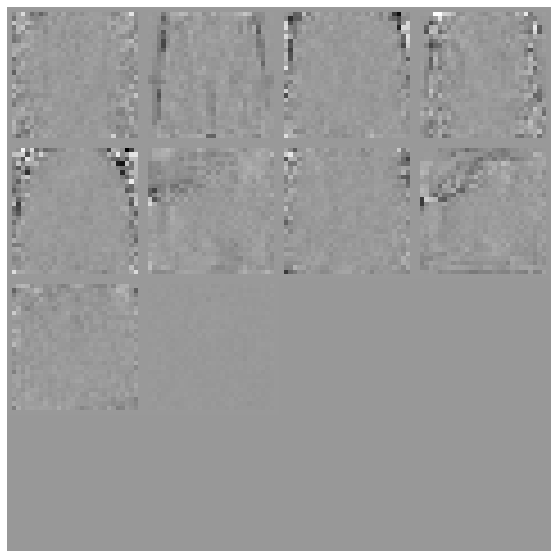

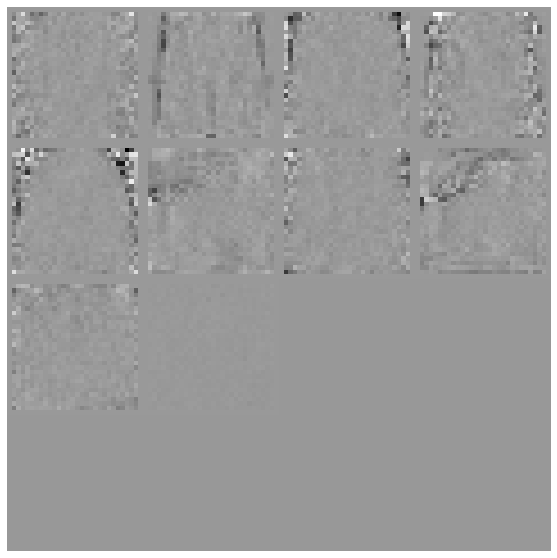

In [ ]:
wb.init(project="Simple_Linear_Adam_KMNS");                                     #this shows how accurate it is done 
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 100000

w = [GPU(Truncated_Normal((784,10)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

    if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

https://playground.tensorflow.org


https://tensorspace.org/

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing